# Binarized analyses of cross-species blood

In [1]:
%load_ext autoreload
%autoreload 2

In [61]:
import itertools
import os

import binarized
import enrich
import matplotlib_venn
# Third-party modules
import numpy as np
import pandas as pd
# Olga's modules
import xspecies

import seaborn as sns

from joblib import Parallel, delayed
from tqdm import tqdm

import scanpy

outdir_gdrive = "/home/olga/googledrive/TabulaMicrocebus/data/cross-species"
outdir_local = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species"
outdirs = outdir_local, outdir_gdrive

# Google drive figure output folder
FIGURE_FOLDER = "/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle"
# !ls -lha $outdir_local

### Local utils to save figures

In [3]:
import sys

# sys.path.append()

sys.path.append(
    "/home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies"
)

from plot_utils import save_figures

Matplotlib Backend: module://ipykernel.pylab.backend_inline


## Constants

In [4]:
groupby = "narrow_group"
species = "species"

tissue = "blood"

figure_folder_base = os.path.join(FIGURE_FOLDER, tissue, "binarized")

# Load data

In [5]:
%%time

h5ad = os.path.join(
    outdir_local,
    f"concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__preprocessed.h5ad",
)
adata = scanpy.read_h5ad(h5ad)
adata

CPU times: user 240 ms, sys: 359 ms, total: 599 ms
Wall time: 1.93 s


AnnData object with n_obs × n_vars = 33103 × 12496
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'cell_id_v1', 'cell_id_v2', 'species_batch', 'compartment_broad', 'compartment_narrow', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'log_counts', 'sqrt_counts'
    var: 'mouse_lemur__gene_name-human_hlca', 'mouse__gene_name-human_hlca', 'ensembl_id-human_sapiens', 'len-human_sapiens', 'mouse_lemur__gene_name-lemur', 'mouse__gene_name-lemur', 'name-lemur', 'highly_variable-lemur', 'mouse_lemur__gene_name-mouse_ce', 'mouse__gene_name-mouse_ce', 'n_cells-mouse_tabula_muris_senis', 'mouse_lemur__gene_name-mouse_tabula_muris_senis', 'mouse__gene_name-mouse_tabula_muris_senis', 'n_cells', 'highly_variable', 'means', 'dispersions'

In [6]:
! ls -lha $h5ad

-rw-r--r-- 1 olga czb 431M Feb 15 11:58 /home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/concatenated__human-lemur-mouse_10x__one2one_orthologs__blood__preprocessed.h5ad


# Within-narrow group, run stability analyses

-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-06 16:42:10,681 INFO: Computing fraction cells expressing genes per narrow_group
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-06 16:42:10,683 INFO: Filtering adata for only narrow_group shared across all 3 species
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-06 16:42:10,688 INFO: Starting number of narrow_group: 6
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-06 16:42:10,713 INFO: After removing groups not in all species narrow_group: 6
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-06 16:42:10,746 INFO: After cell groups with too few cells in narrow_group: 6
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/not

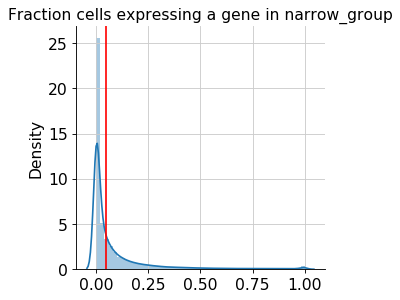

In [7]:
stability = binarized.BinarizedStabilityAnalyses(
    adata, groupby, species, debug=True, species_order=["Human", "Mouse lemur", "Mouse"]
)

Binarizing at thresholds: [0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09, 0.09999999999999999, 0.11, 0.12, 0.13, 0.14, 0.15000000000000002, 0.16, 0.17, 0.18000000000000002, 0.19, 0.2, 0.21000000000000002, 0.22, 0.23, 0.24000000000000002, 0.25, 0.26, 0.27, 0.28, 0.29000000000000004, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36000000000000004, 0.37, 0.38, 0.39]: 100%|██████████| 39/39 [00:00<00:00, 1736.31it/s]
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-06 16:42:13,134 INFO: Computing pairwise mutual information across thresholds
Computing mutual information between thresholds: 0it [00:00, ?it/s][Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
Computing mutual information between thresholds: 48it [00:37,  1.71it/s][Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   40.2s
Computing mutual information between thresholds: 192it [02:45,  1.14it/s][P

(2464566, 4)


-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-06 16:55:35,714 INFO: Number of stable genes: 3326/12459 (26.70%)
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-06 16:55:35,726 INFO: Number of unstable genes: 9133/12459 (73.30%)


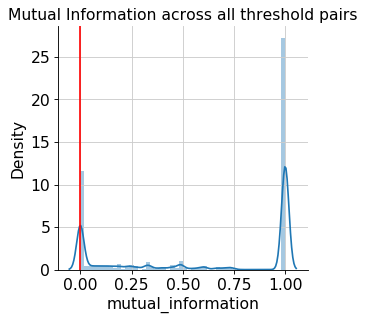

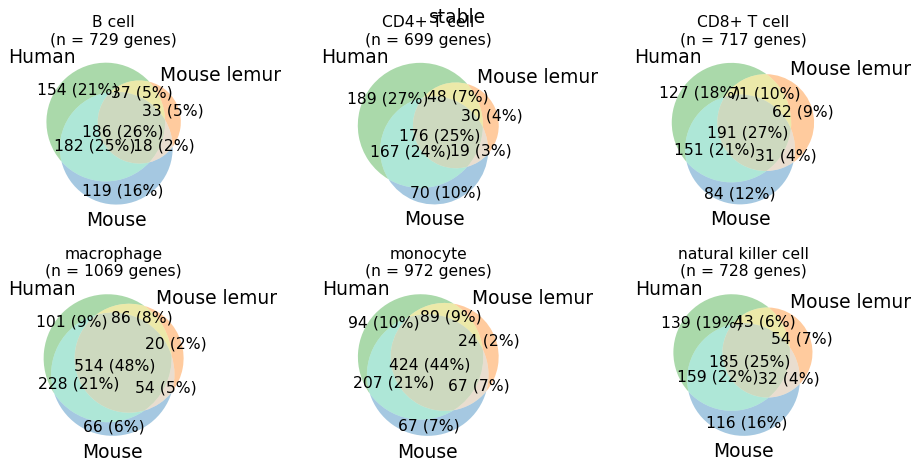

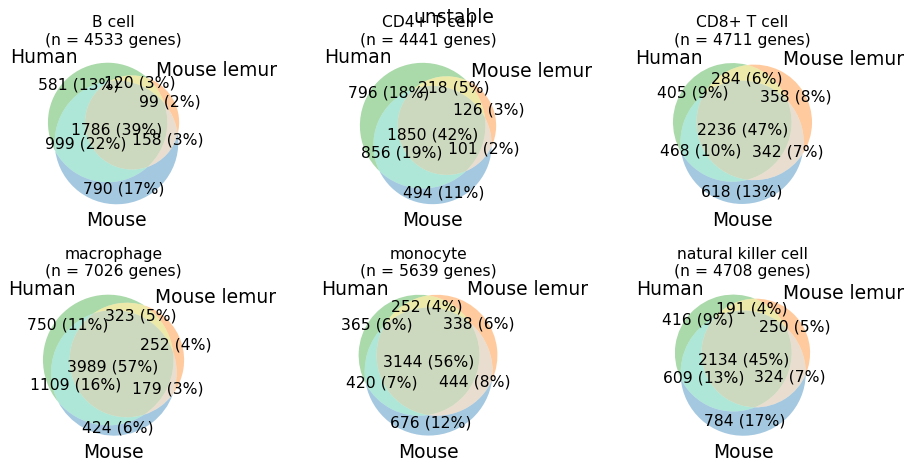

In [8]:
stability.do_stability_analysis(thresholds=np.arange(0.01, 0.4, 0.01))

In [9]:
stability.mutual_information

gene_name  mutual_information fraction1 fraction2
0          XKR4            0.607327     1.00%     2.00%
1         SOX17            0.326177     1.00%     2.00%
2        MRPL15            0.000000     1.00%     2.00%
3        LYPLA1            0.697347     1.00%     2.00%
4         TCEA1            1.000000     1.00%     2.00%
...         ...                 ...       ...       ...
12454      MID1            1.000000    38.00%    39.00%
12455      ASMT            1.000000    38.00%    39.00%
12456     VAMP7            0.000000    38.00%    39.00%
12457     SPRY3            1.000000    38.00%    39.00%
12458     TMLHE            1.000000    38.00%    39.00%

[9232119 rows x 4 columns]

In [10]:
stability.binarized['VAMP7']

species      narrow_group       
Mouse        B cell                 False
             CD4+ T cell             True
             CD8+ T cell             True
             macrophage              True
             monocyte                True
             natural killer cell     True
Mouse lemur  B cell                 False
             CD4+ T cell            False
             CD8+ T cell            False
             macrophage              True
             monocyte                True
             natural killer cell    False
Human        B cell                  True
             CD4+ T cell             True
             CD8+ T cell             True
             macrophage              True
             monocyte                True
             natural killer cell     True
Name: VAMP7, dtype: bool

Saving figures: 100%|██████████| 2/2 [00:09<00:00,  4.69s/it]


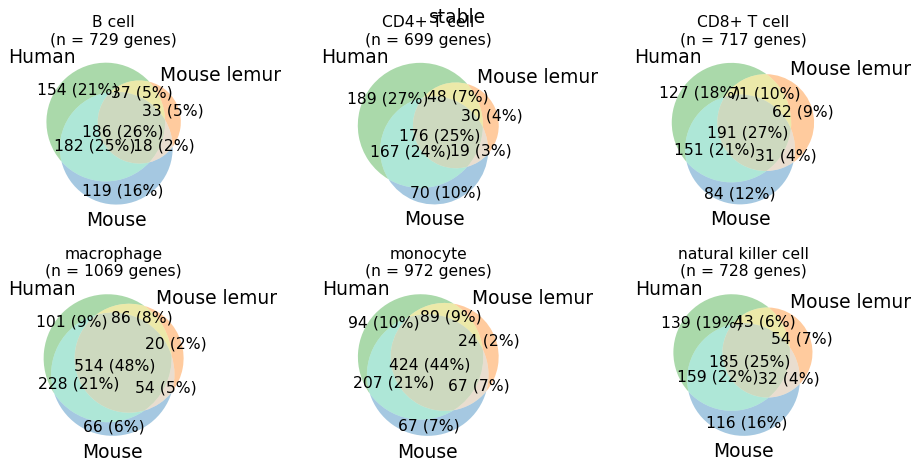

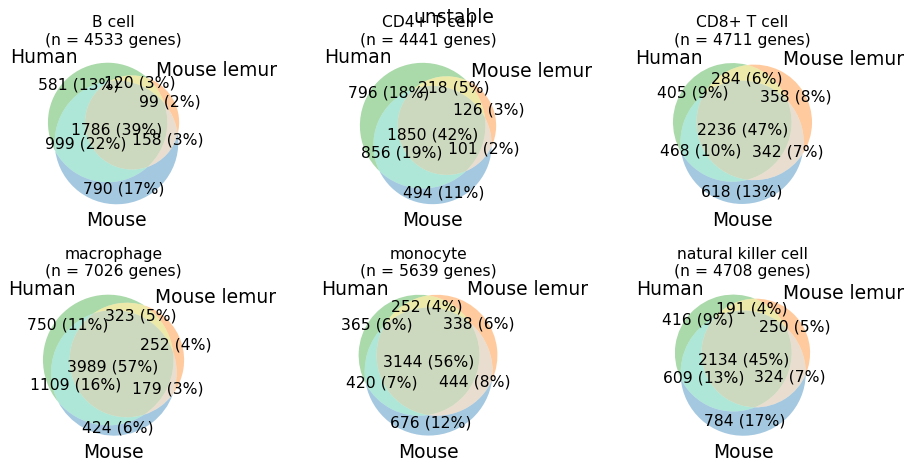

In [11]:
stability.plot_venns()
figure_folder = os.path.join(figure_folder_base, "stable-genes")

save_figures(figure_folder)

### Skip GO enrichment for now --> need to install `gprofiler-official`

In [13]:
# stability.do_go_enrichment(plot=True, write=True)

## Plot enrichment, groupby enrichment database source

In [14]:
# stability.plot_go_enrichment(groupby_source=True)

# Do primate enrichment

In [15]:
species

'species'

-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-09 08:53:11,337 INFO: Computing fraction cells expressing genes per narrow_group
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-09 08:53:11,339 INFO: Filtering adata for only narrow_group shared across all 3 species
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-09 08:53:11,529 INFO: Starting number of narrow_group: 6
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-09 08:53:11,617 INFO: After removing groups not in all species narrow_group: 6
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-09 08:53:11,667 INFO: After cell groups with too few cells in narrow_group: 6
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/not

CPU times: user 17.7 s, sys: 43.6 s, total: 1min 1s
Wall time: 2min 6s


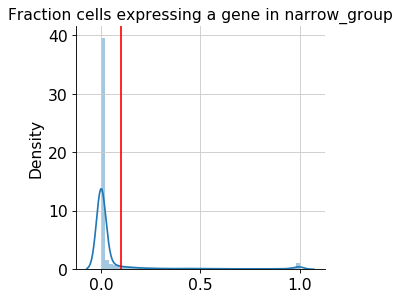

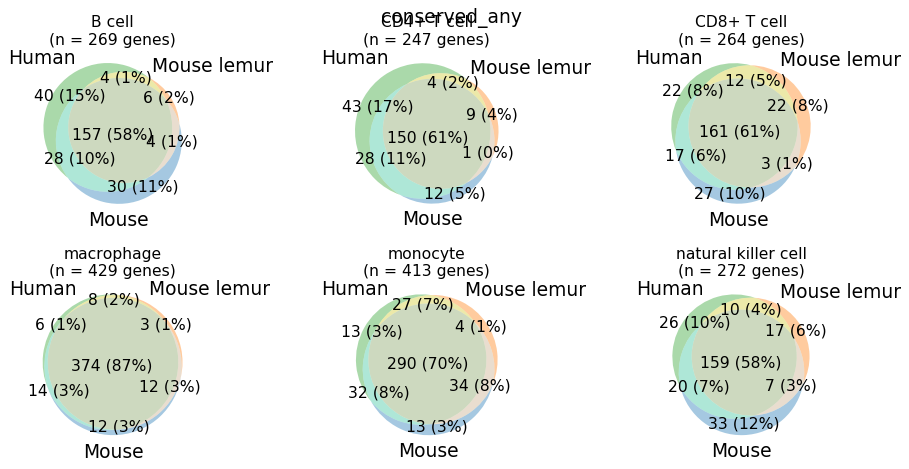

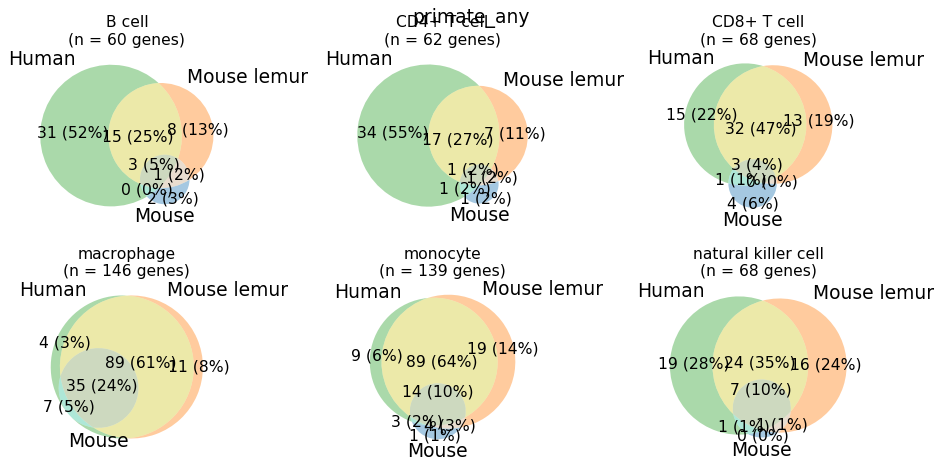

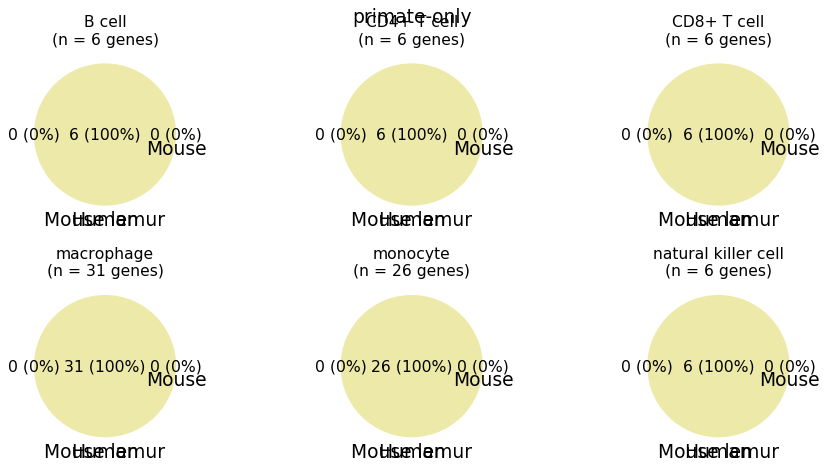

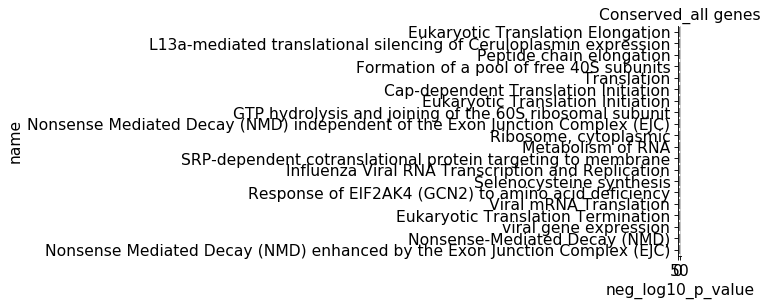

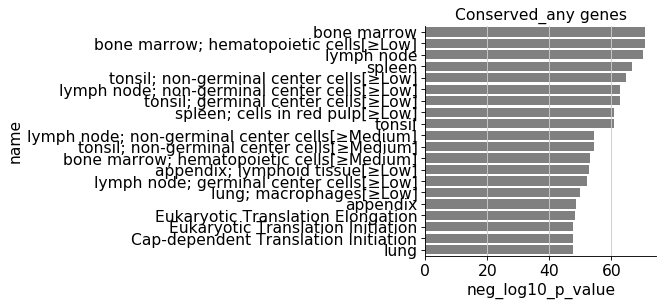

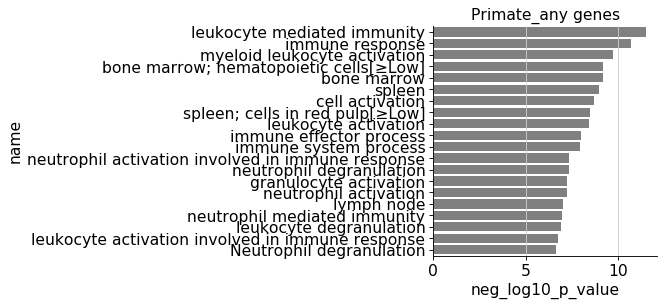

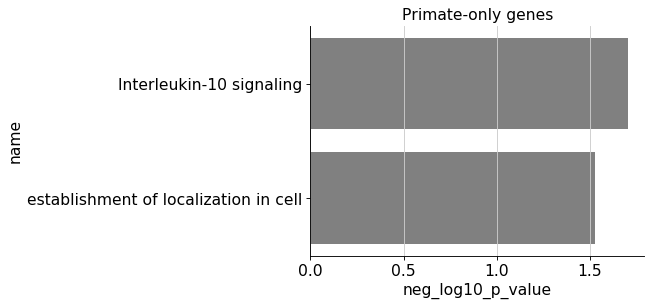

In [16]:
%%time

import binarized

primate = binarized.BinarizedPrimateAnalyses(
    adata,
    groupby,
    species,
    stable_genes=stability.stable_gene_names,
    debug=True,
    primates=["Human", "Mouse lemur"],
    species_order=["Human", "Mouse lemur", "Mouse"],
)
primate.find_primate_enriched_genes()

figure_folder = os.path.join(FIGURE_FOLDER, tissue, "primate")

save_figures(figure_folder)

## Make dotplots of primate_only genes

In [17]:
cross_species = xspecies.CrossSpeciesComparison(adata, 'compartment_narrow')
# cross_species.plot_shared_cell_types()

compartment_narrow             species    
lymphoid: B cell               Mouse           1834
                               Mouse lemur      674
                               Human            230
lymphoid: CD4+ T cell          Mouse            570
                               Mouse lemur     1645
                               Human           2297
lymphoid: CD8+ T cell          Mouse            467
                               Mouse lemur      153
                               Human           1942
lymphoid: natural killer cell  Mouse            535
                               Mouse lemur      374
                               Human           3698
myeloid: macrophage            Mouse            338
                               Mouse lemur       33
                               Human          13737
myeloid: monocyte              Mouse           1446
                               Mouse lemur     1292
                               Human           1838
dtype: int64


In [18]:
cross_species.make_subset_adatas(do_pca_umap=False)


------- group: lymphoid: B cell -------
number of cells: 2738

------- group: lymphoid: CD4+ T cell -------
number of cells: 4512

------- group: lymphoid: CD8+ T cell -------
number of cells: 2562

------- group: lymphoid: natural killer cell -------
number of cells: 4607

------- group: myeloid: macrophage -------
number of cells: 14108

------- group: myeloid: monocyte -------
number of cells: 4576

------- group: Mouse -------
number of cells: 5190

------- group: Mouse lemur -------
number of cells: 4171

------- group: Human -------
number of cells: 23742


In [19]:
narrow_to_compartment_narrrow = dict(zip(adata.obs.narrow_group, adata.obs.compartment_narrow))
narrow_to_compartment_narrrow

{'natural killer cell': 'lymphoid: natural killer cell',
 'B cell': 'lymphoid: B cell',
 'monocyte': 'myeloid: monocyte',
 'CD8+ T cell': 'lymphoid: CD8+ T cell',
 'CD4+ T cell': 'lymphoid: CD4+ T cell',
 'macrophage': 'myeloid: macrophage'}

In [20]:
figure_folder_base
dotplot_dir = os.path.join(figure_folder_base, 'dotplots')
scanpy.settings.figdir = dotplot_dir
! mkdir -p $dotplot_dir

gene subset #1

------- group: lymphoid: B cell -------


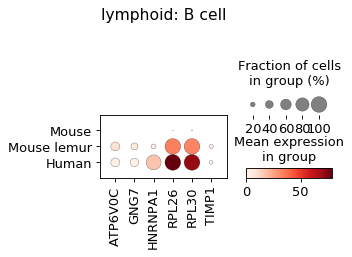

gene subset #1

------- group: lymphoid: CD4+ T cell -------


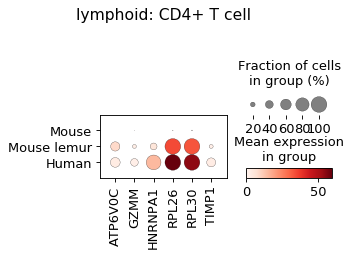

gene subset #1

------- group: lymphoid: CD8+ T cell -------


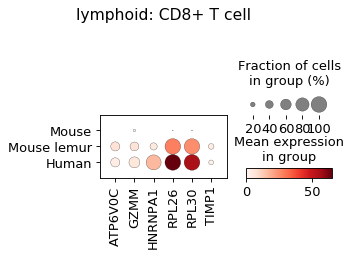

gene subset #1

------- group: myeloid: macrophage -------


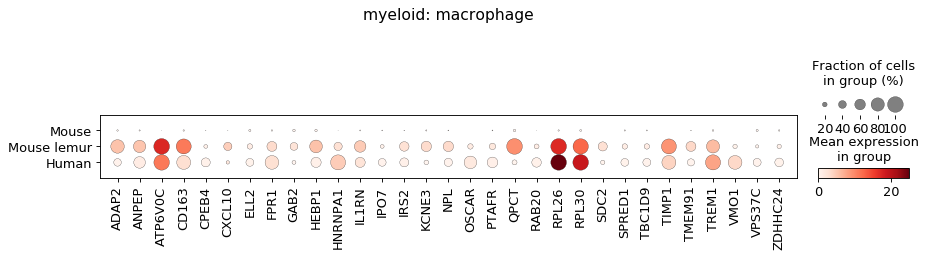

gene subset #1

------- group: myeloid: monocyte -------


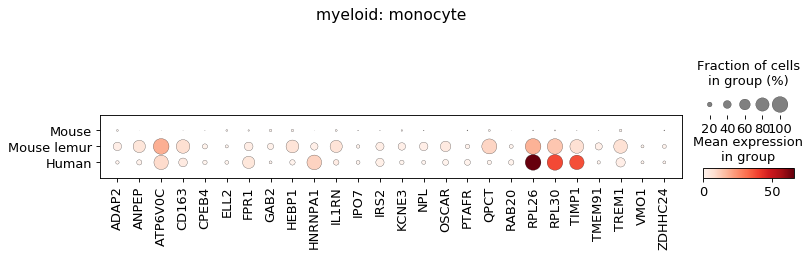

gene subset #1

------- group: lymphoid: natural killer cell -------


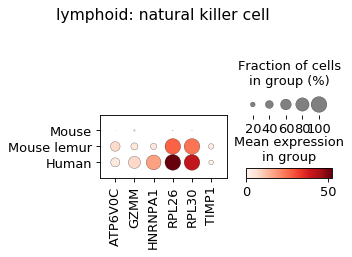

In [21]:


for col_name, col_values in primate.primate_all.iteritems():
    gene_names = col_values.index[col_values.notnull()]
    col_name_sanitized = xspecies.sanitize(col_name)
    
    compartment_narrow_col = narrow_to_compartment_narrrow[col_name]
    cross_species.dotplots(
        gene_names,
        save=f"__binary__{col_name_sanitized}",
        select_group=compartment_narrow_col,
        save_format="pdf",
        max_genes=32,
    )

## Dotplots of primate-enriched genes, no dissociation genes

### Get list of dissociation genes

In [22]:
dissociation_genes = set(pd.read_csv('/home/olga/data_lg/data_sm_copy/immune-evolution/databases/nuisance-genes/dissociation_genes_3Nov2020.csv', index_col=0, squeeze=True))
len(dissociation_genes)

1880

### Primate-enriched genes from binarized analyses, minus dissocaition genes

gene subset #1

------- group: lymphoid: B cell -------


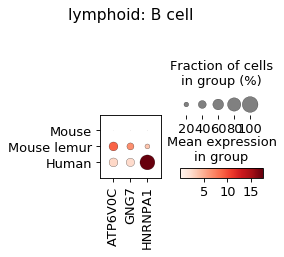

gene subset #1

------- group: lymphoid: CD4+ T cell -------


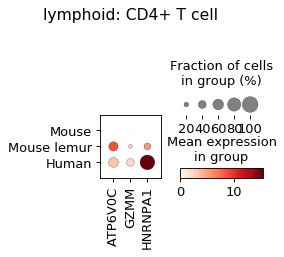

gene subset #1

------- group: lymphoid: CD8+ T cell -------


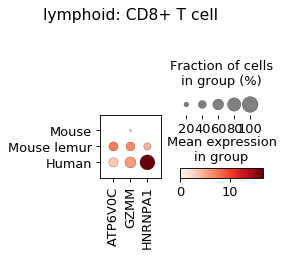

gene subset #1

------- group: myeloid: macrophage -------


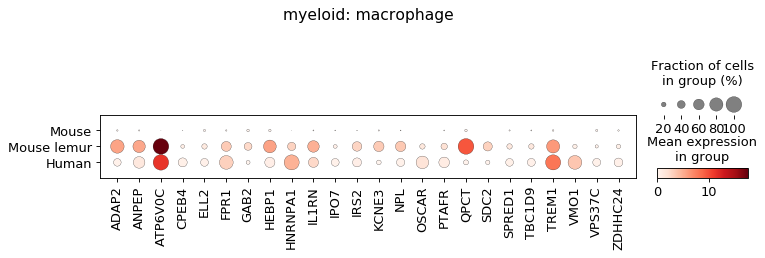

gene subset #1

------- group: myeloid: monocyte -------


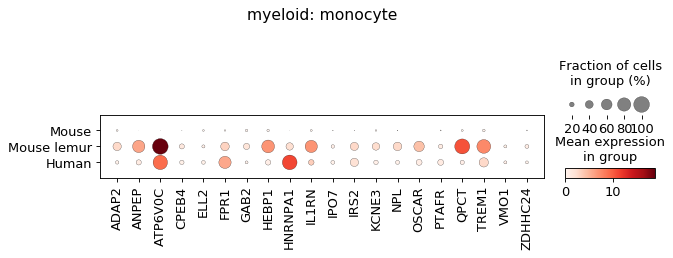

gene subset #1

------- group: lymphoid: natural killer cell -------


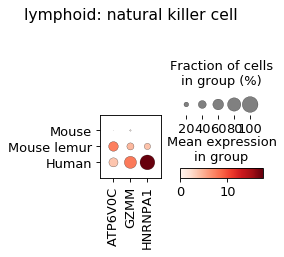

In [23]:
for col_name, col_values in primate.primate_all.iteritems():
    gene_names = col_values.index[col_values.notnull()]
    gene_names = [x for x in gene_names if x not in dissociation_genes]
    col_name_sanitized = xspecies.sanitize(col_name)
    
    compartment_narrow_col = narrow_to_compartment_narrrow[col_name]
    cross_species.dotplots(
        gene_names,
        save=f"__binary__no_dissociation_genes__{col_name_sanitized}",
        select_group=compartment_narrow_col,
        save_format="pdf",
        max_genes=32,
    )

## Get p value of overlap of binary groups

In [24]:
lines = []

for celltype, df in primate.binarized.groupby(level=1):
    #     print(df.head())
    for species1, species2 in itertools.combinations(primate.species_order, 2):
        pvalue = binarized.overlap_pvalue_sf(
            df.loc[(species1, celltype)], df.loc[(species2, celltype)], log=True
        )

        species_pair = primate.separator.join([species1, species2])
        line = [celltype, species1, species2, species_pair, pvalue]
        lines.append(line)

pvalue_df = pd.DataFrame(
    lines, columns=["celltype", "species1", "species2", "species_pair", "log_pvalue"]
)
pvalue_df["log_pvalue_adjusted"] = pvalue_df["log_pvalue"] + np.log(len(pvalue_df))

pvalue_df

celltype     species1     species2        species_pair  \
0                B cell        Human  Mouse lemur  Human--Mouse lemur   
1                B cell        Human        Mouse        Human--Mouse   
2                B cell  Mouse lemur        Mouse  Mouse lemur--Mouse   
3           CD4+ T cell        Human  Mouse lemur  Human--Mouse lemur   
4           CD4+ T cell        Human        Mouse        Human--Mouse   
5           CD4+ T cell  Mouse lemur        Mouse  Mouse lemur--Mouse   
6           CD8+ T cell        Human  Mouse lemur  Human--Mouse lemur   
7           CD8+ T cell        Human        Mouse        Human--Mouse   
8           CD8+ T cell  Mouse lemur        Mouse  Mouse lemur--Mouse   
9            macrophage        Human  Mouse lemur  Human--Mouse lemur   
10           macrophage        Human        Mouse        Human--Mouse   
11           macrophage  Mouse lemur        Mouse  Mouse lemur--Mouse   
12             monocyte        Human  Mouse lemur  Human--Mouse lemur   
13             monocyte        Human        Mouse        Human--Mouse   
14             monocyte  Mouse lemur        Mouse  Mouse lemur--Mouse   
15  natural killer cell        Human  Mouse lemur  Human--Mouse lemur   
16  natural killer cell        Human        Mouse        Human--Mouse   
17  natural killer cell  Mouse lemur        Mouse  Mouse lemur--Mouse   

    log_pvalue  log_pvalue_adjusted  
0  -332.550474          -329.660102  
1  -436.646979          -433.756607  
2  -334.542459          -331.652087  
3  -303.699257          -300.808885  
4  -435.783270          -432.892899  
5  -327.733298          -324.842926  
6  -349.127010          -346.236639  
7  -435.814132          -432.923760  
8  -300.166798          -297.276427  
9  -513.243321          -510.352949  
10 -766.788252          -763.897880  
11 -479.056102          -476.165730  
12 -469.016772          -466.126400  
13 -558.314364          -555.423992  
14 -430.703069          -427.812697  
15 -327.271354          -324.380983  
16 -386.444557          -383.554185  
17 -293.214128          -290.323756

## Find cell types where the human-lemur overlap is larger than human-mouse

In [25]:
pvalue_df_species_pair_index = pvalue_df.set_index("species_pair")
pvalue_df_species_pair_index.head()

celltype     species1     species2  log_pvalue  \
species_pair                                                            
Human--Mouse lemur       B cell        Human  Mouse lemur -332.550474   
Human--Mouse             B cell        Human        Mouse -436.646979   
Mouse lemur--Mouse       B cell  Mouse lemur        Mouse -334.542459   
Human--Mouse lemur  CD4+ T cell        Human  Mouse lemur -303.699257   
Human--Mouse        CD4+ T cell        Human        Mouse -435.783270   

                    log_pvalue_adjusted  
species_pair                             
Human--Mouse lemur          -329.660102  
Human--Mouse                -433.756607  
Mouse lemur--Mouse          -331.652087  
Human--Mouse lemur          -300.808885  
Human--Mouse                -432.892899

In [26]:
is_primate_enriched_celltypes = pvalue_df_species_pair_index.groupby("celltype").apply(
    lambda x: x.loc["Human--Mouse lemur", "log_pvalue_adjusted"]
    < x.loc["Human--Mouse", "log_pvalue_adjusted"]
)
is_primate_enriched_celltypes

celltype
B cell                 False
CD4+ T cell            False
CD8+ T cell            False
macrophage             False
monocyte               False
natural killer cell    False
dtype: bool

In [27]:
primate_enriched_celltypes = is_primate_enriched_celltypes[
    is_primate_enriched_celltypes
].index

## Plot difference in p-value of overlap between binarized genes in cell types

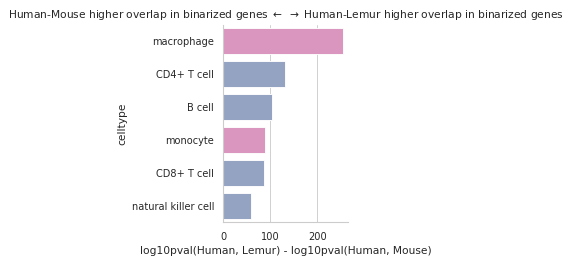

In [28]:
pvalue_diff = pvalue_df_species_pair_index.groupby("celltype").apply(
    lambda x: x.loc["Human--Mouse lemur", "log_pvalue_adjusted"]
    - x.loc["Human--Mouse", "log_pvalue_adjusted"]
)
pvalue_diff = pvalue_diff.reset_index()
pvalue_diff = pvalue_diff.rename(columns={0: "diff_log_pvalue"})
pvalue_diff = pvalue_diff.sort_values("diff_log_pvalue", ascending=False)
pvalue_diff.head()

narrow_to_compartment = adata.obs[["narrow_group", "compartment_group"]].set_index(
    "narrow_group"
)
narrow_to_compartment = narrow_to_compartment.loc[
    ~narrow_to_compartment.index.duplicated(), "compartment_group"
]
narrow_to_compartment

pvalue_diff["compartment"] = pvalue_diff.celltype.map(narrow_to_compartment)
pvalue_diff.head()

colors = {
    x: xspecies.compartment_to_color[y]
    for i, (x, y) in pvalue_diff[["celltype", "compartment"]].iterrows()
}


sns.set(context="paper", style="whitegrid")

g = sns.catplot(
    data=pvalue_diff, y="celltype", x="diff_log_pvalue", kind="bar", palette=colors,
    height=3
)
g.set(xlabel="log10pval(Human, Lemur) - log10pval(Human, Mouse)")
pdf = os.path.join(
    figure_folder_base,
    f"binarized__{tissue}__pvalue_diff_overlap__human-lemur_vs_human-mouse.pdf",
)
g.set(
    title=(
        r"Human-Mouse higher overlap in binarized genes $\leftarrow$"
        r" $\rightarrow$ Human-Lemur higher overlap in binarized genes"
    )
)
g.savefig(pdf)

### Venn diagrams of conserved vs primate

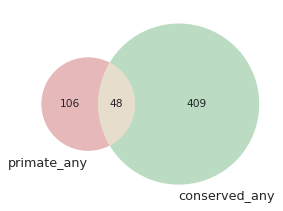

In [29]:
set_list = [set(primate.primate_any.index), set(primate.conserved_any.index)]
labels = ["primate_any", "conserved_any"]

matplotlib_venn.venn2(set_list, set_labels=labels)

In [30]:
has_mouse = primate.species_sharing_2d.applymap(
    lambda x: "mouse" in x if isinstance(x, str) else x
)
rows = has_mouse.any(axis=1)
mouse_any = primate.species_sharing_2d.loc[rows]
print(mouse_any.shape)
mouse_any.head()

(0, 6)


Empty DataFrame
Columns: [B cell, CD4+ T cell, CD8+ T cell, macrophage, monocyte, natural killer cell]
Index: []

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


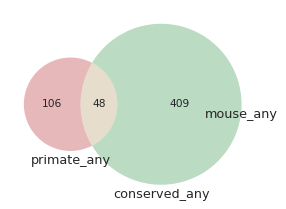

In [31]:
set_list = [
    set(primate.primate_any.index),
    set(primate.conserved_any.index),
    set(mouse_any.index),
]
labels = ["primate_any", "conserved_any", "mouse_any"]

matplotlib_venn.venn3(set_list, set_labels=labels)

In [32]:
len(primate.primate_any.index.intersection(primate.primate_all.index))

33

In [33]:
len(primate.primate_any.index.intersection(primate.conserved_any.index))

48

In [34]:
# compartment_primate.dotplot("HHIP")

In [35]:
rows = (
    (primate.species_sharing_2d == "human-lemur") | primate.species_sharing_2d.isnull()
).all(axis=1)
df = primate.species_sharing_2d.loc[rows]
df = df.dropna(how="all")
df

Empty DataFrame
Columns: [B cell, CD4+ T cell, CD8+ T cell, macrophage, monocyte, natural killer cell]
Index: []

### Plot all-conserved or all-primate, groupby source

In [36]:
## this is empty, skip
# primate.do_go_enrichment(groupby_source=True, write=True)

### Do per-compartment enrichment, overall

In [37]:
# primate.do_per_group_enrichment()

### Do per-compartment enrichment, per-source

-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-09 08:56:37,329 INFO: Wrote:
/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/binarized/binarized_expression__stable_genes__conserved_any__narrow_group__b_cell__functional_enrichment.csv
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-09 08:56:40,641 INFO: Wrote:
/home/olga/googledrive/TabulaMicrocebus/data/cross-species/binarized/binarized_expression__stable_genes__conserved_any__narrow_group__b_cell__functional_enrichment.csv
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-04-09 08:57:14,190 INFO: Wrote:
/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/binarized/binarized_expression__stable_genes__conserved_any__narrow_group__cd4+_t_cell__functional_enrichment.csv
-- /home/olga/code/tabula-microcebus--olgabo

OSError: [Errno 5] Input/output error

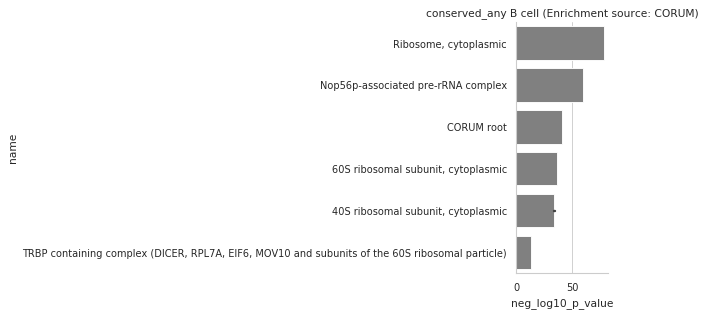

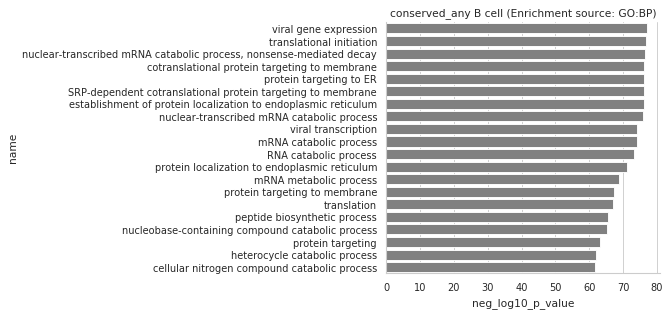

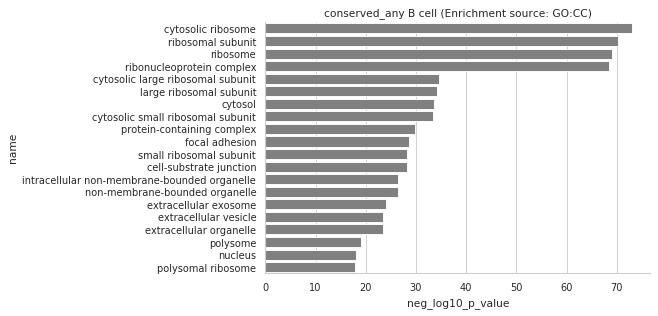

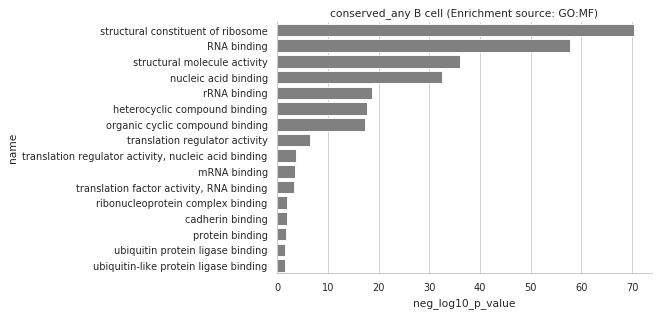

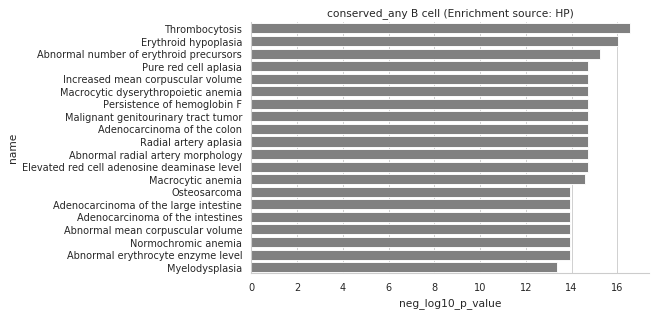

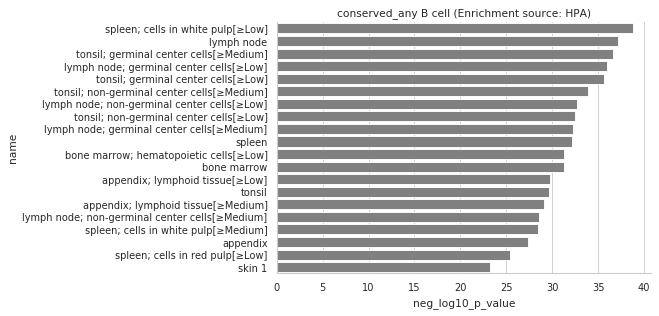

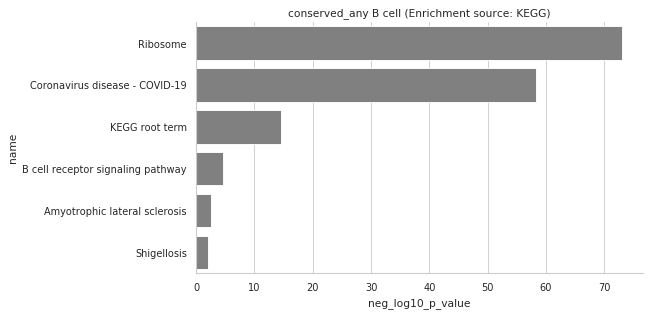

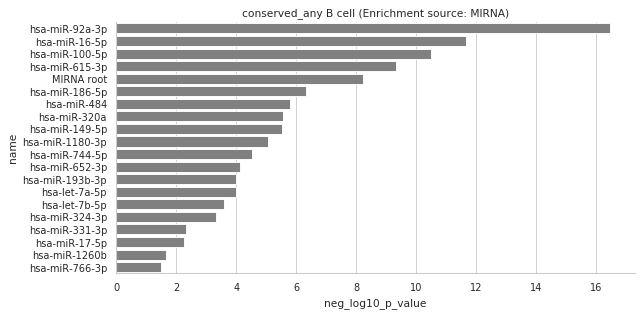

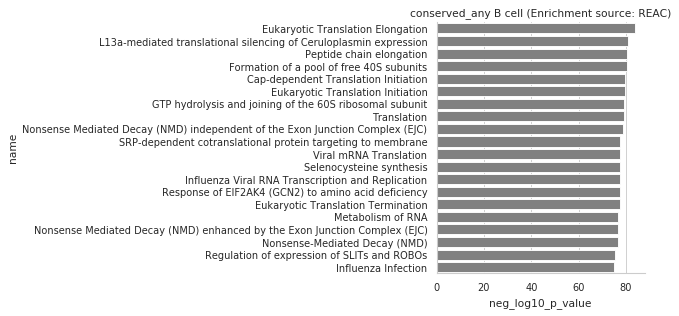

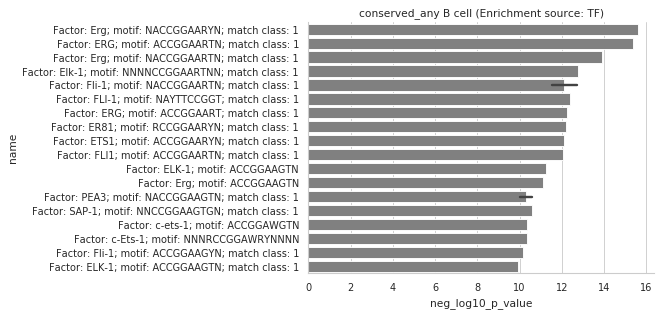

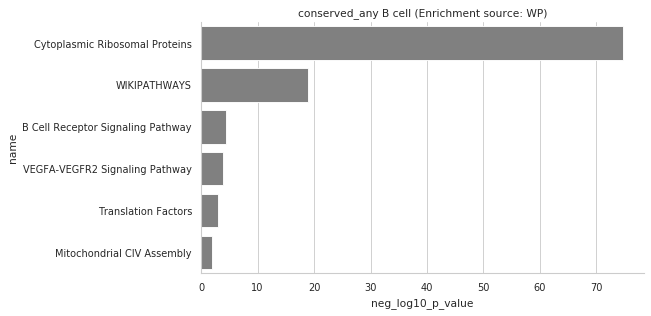

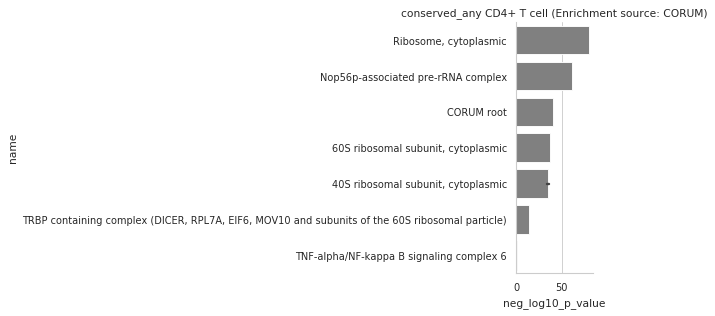

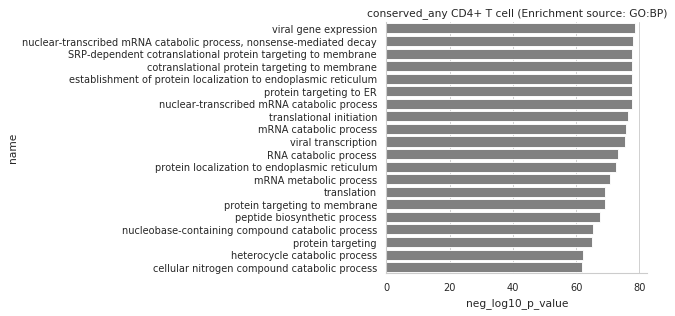

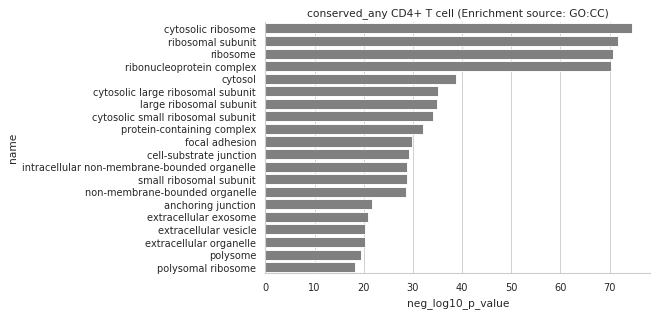

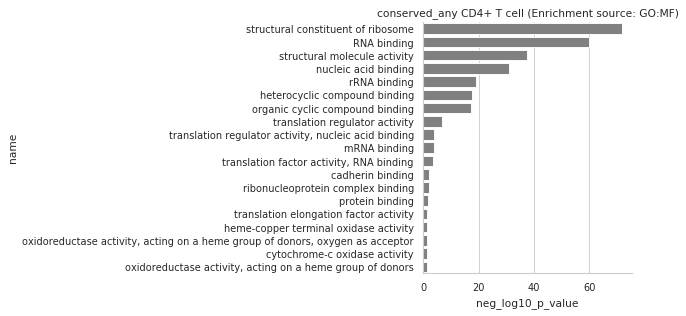

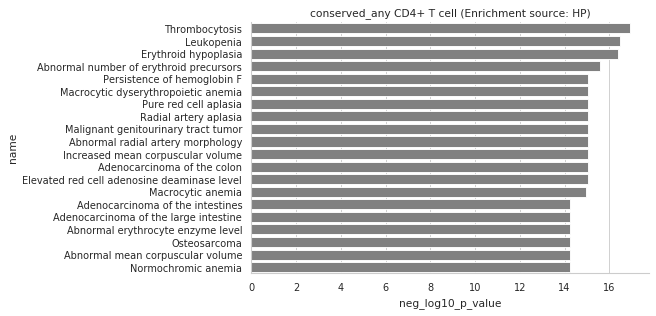

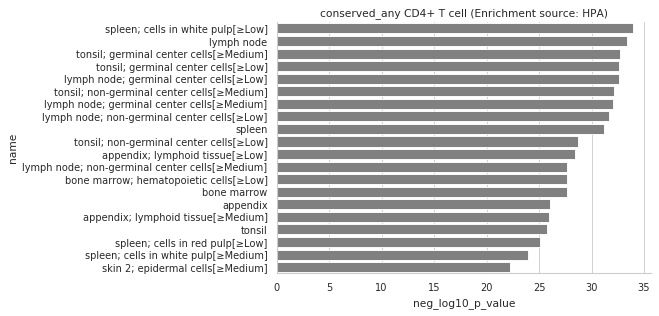

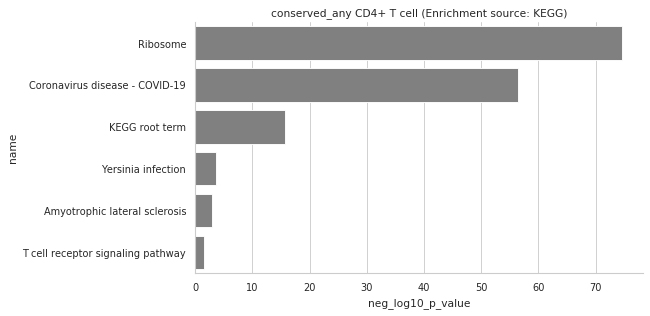

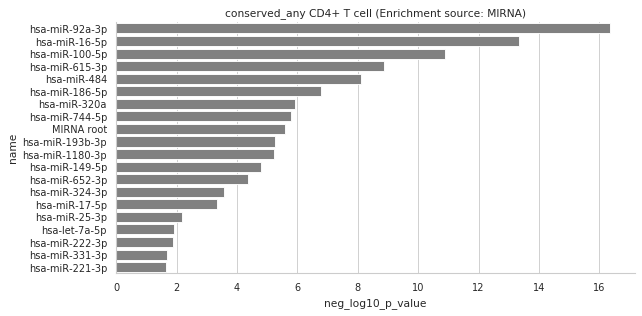

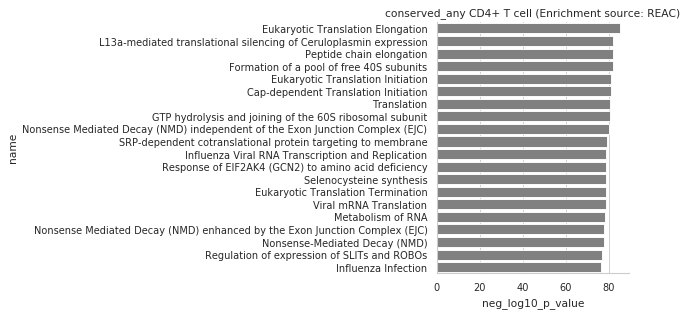

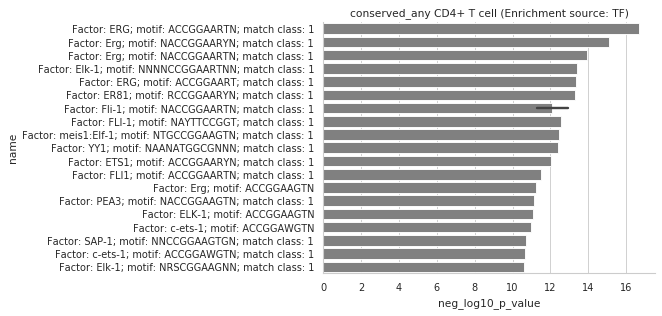

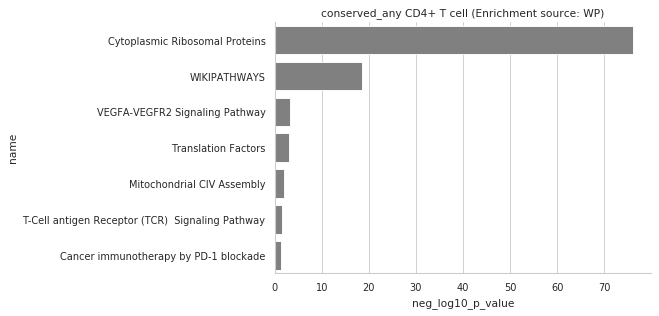

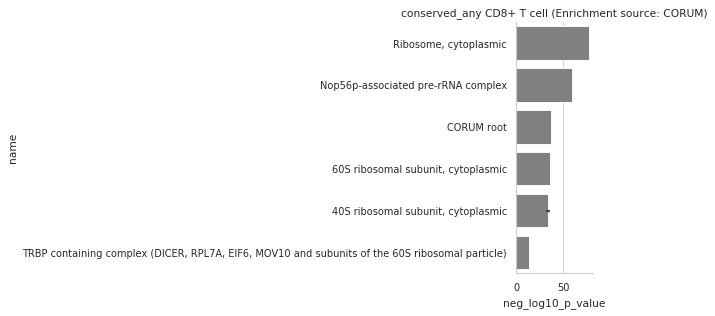

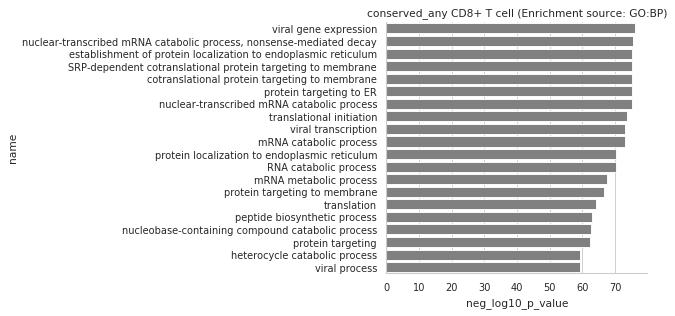

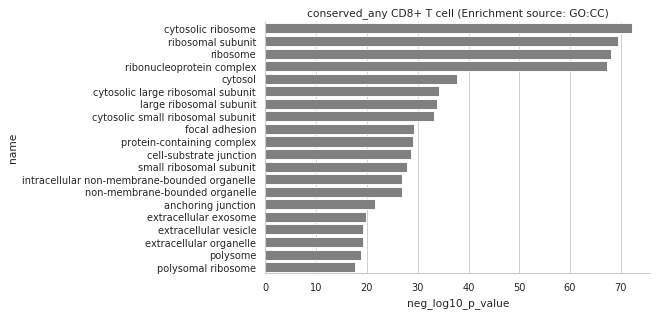

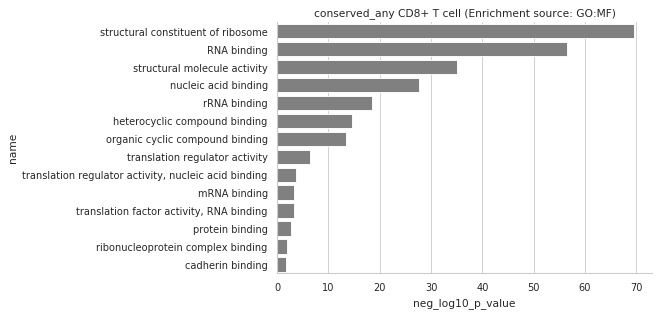

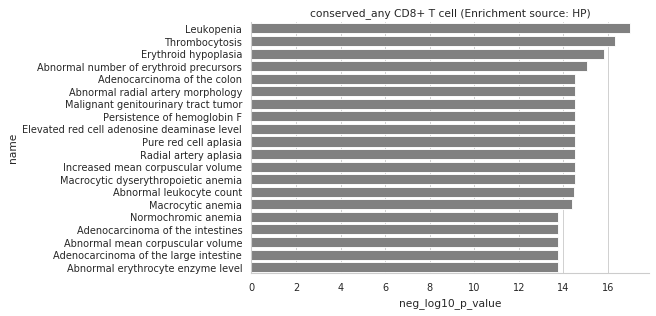

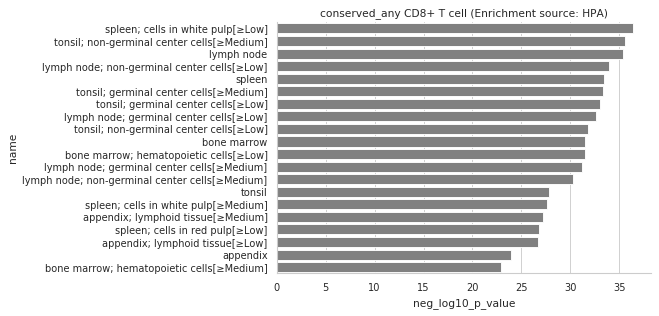

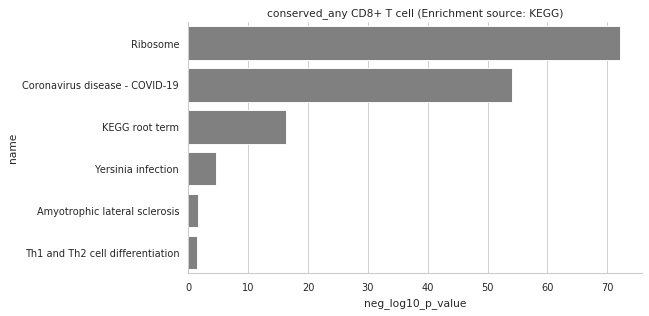

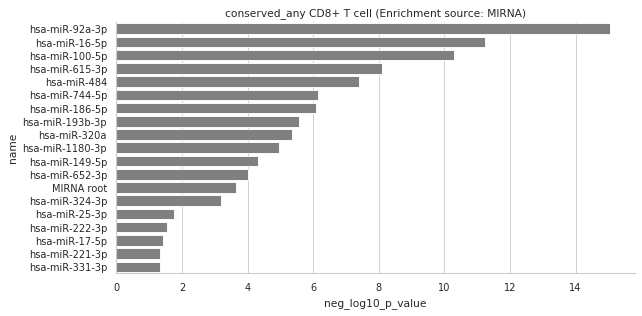

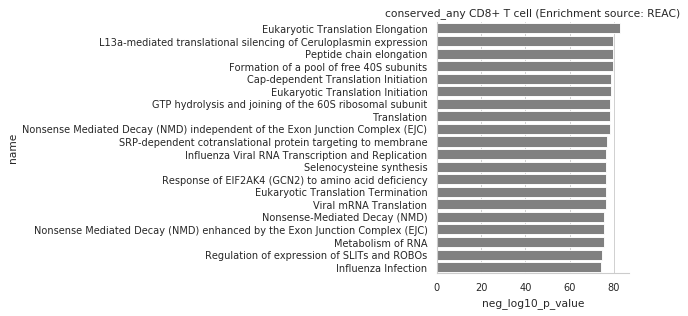

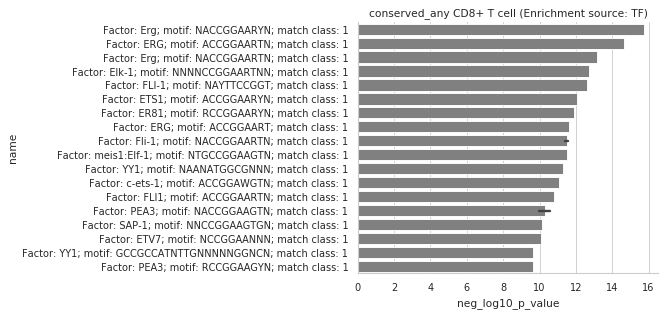

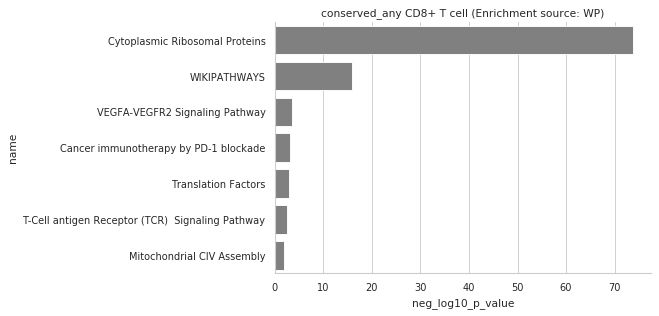

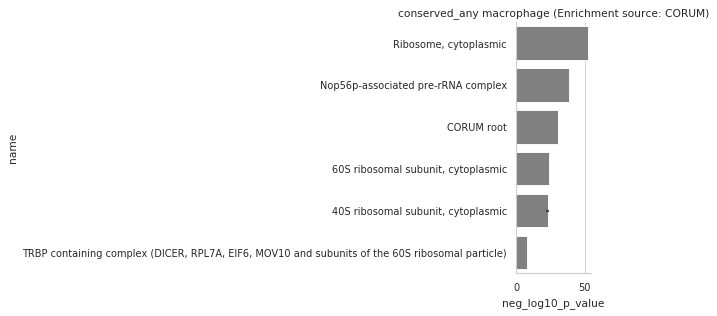

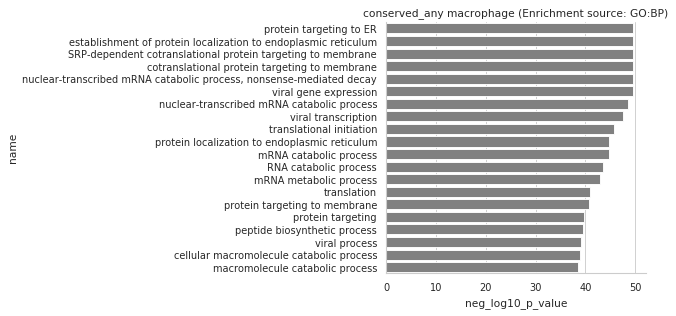

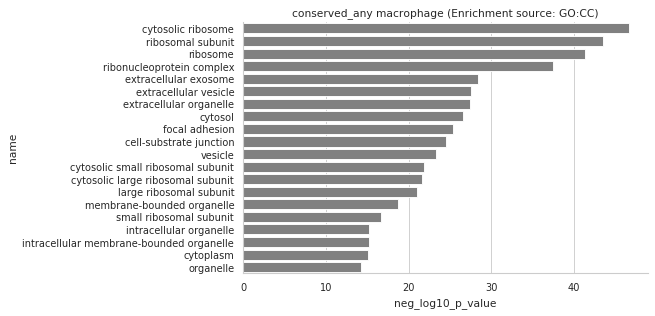

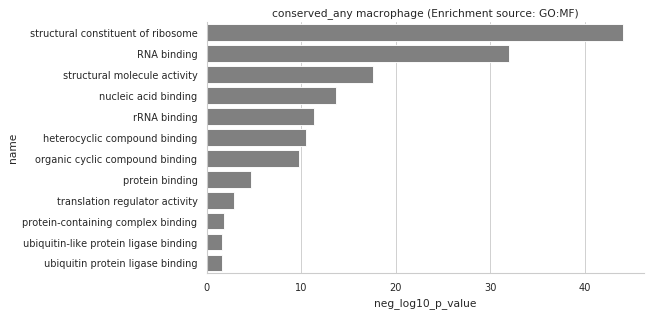

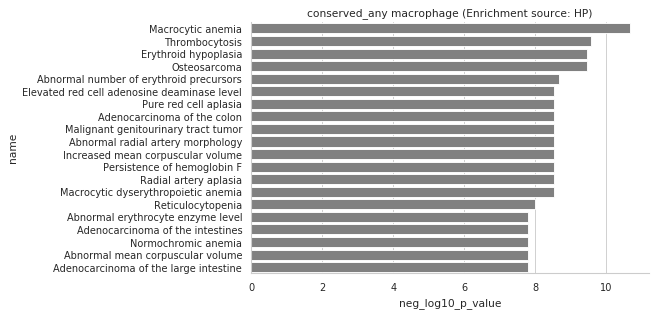

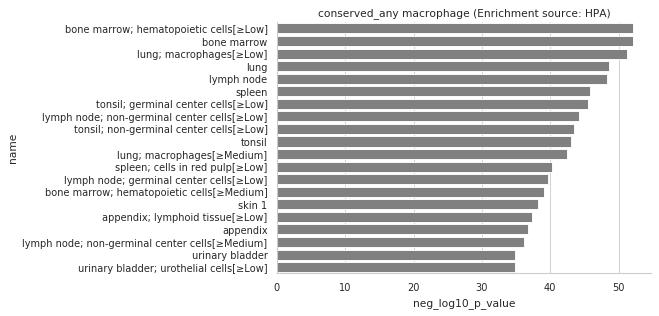

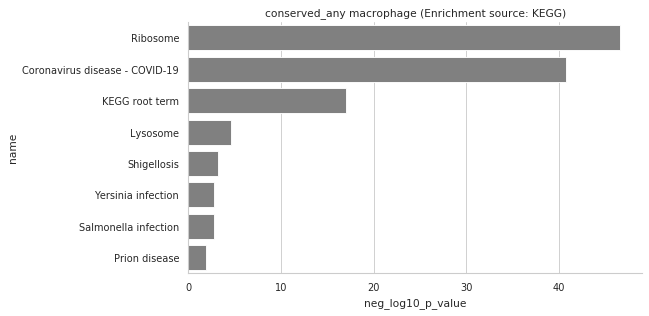

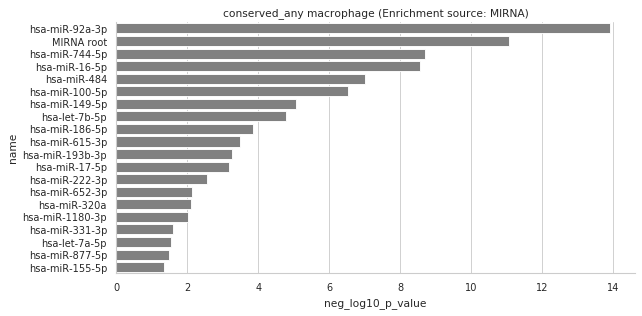

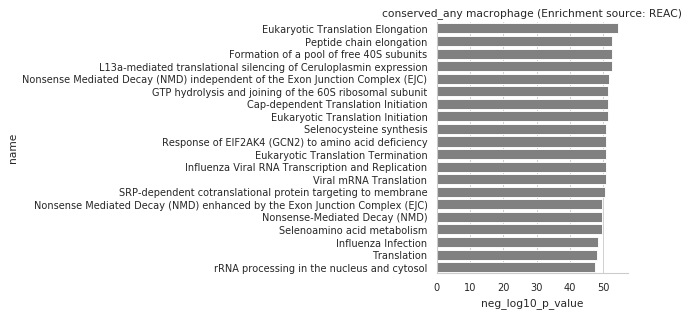

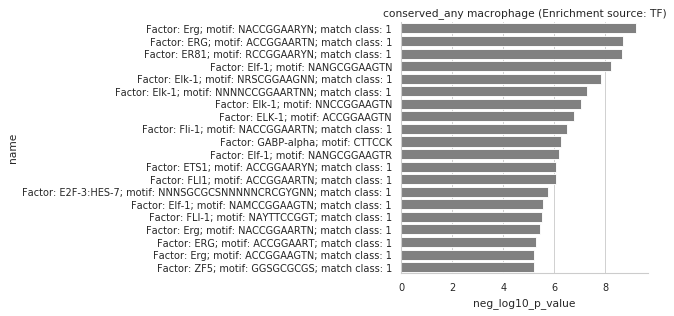

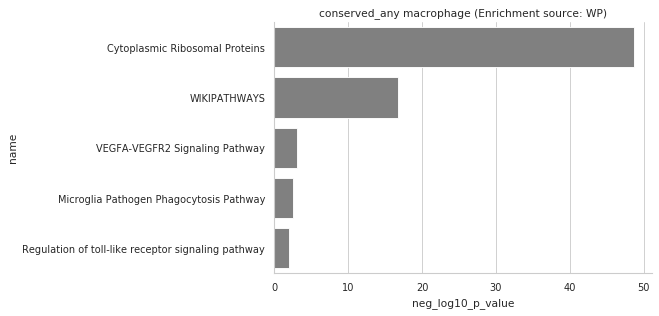

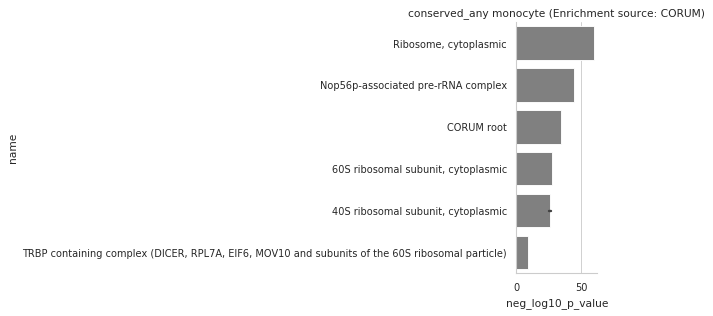

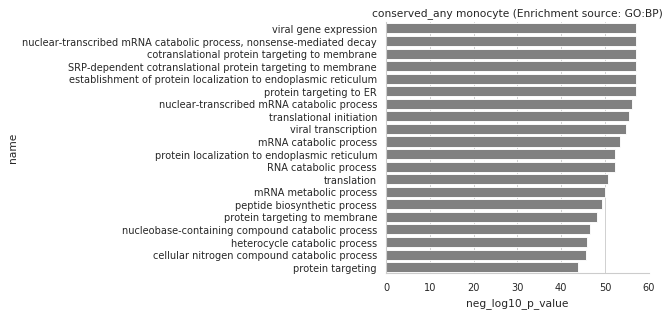

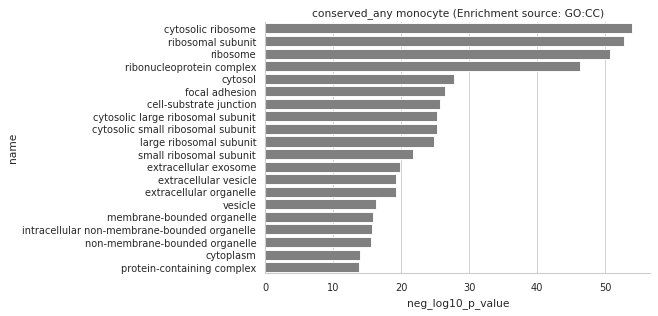

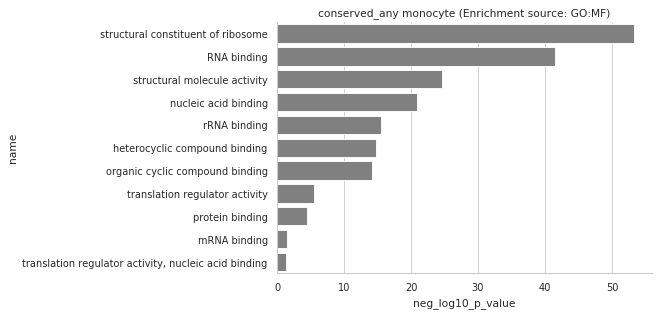

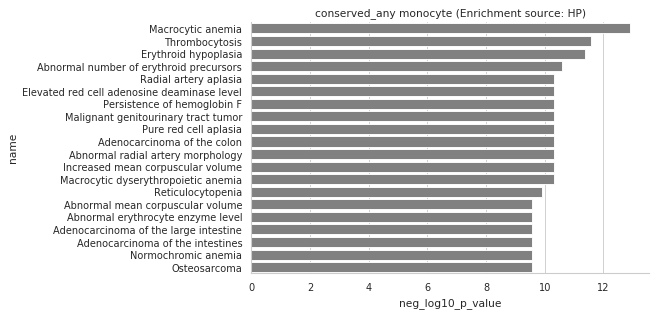

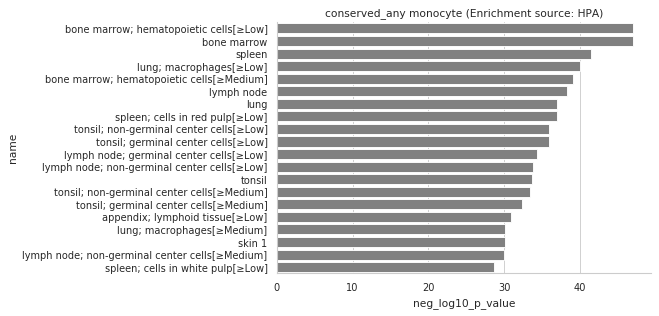

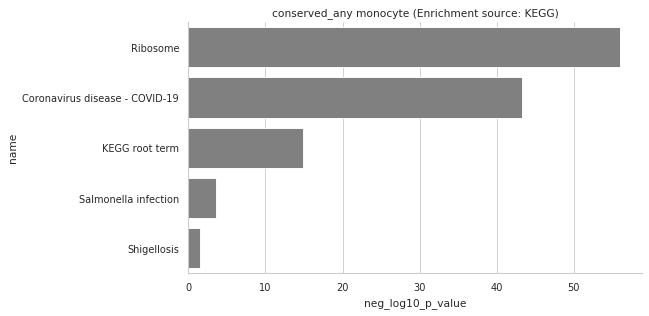

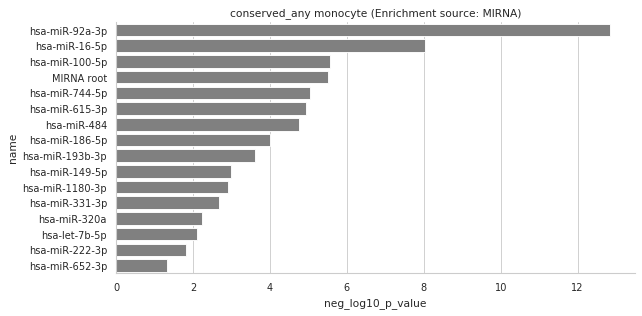

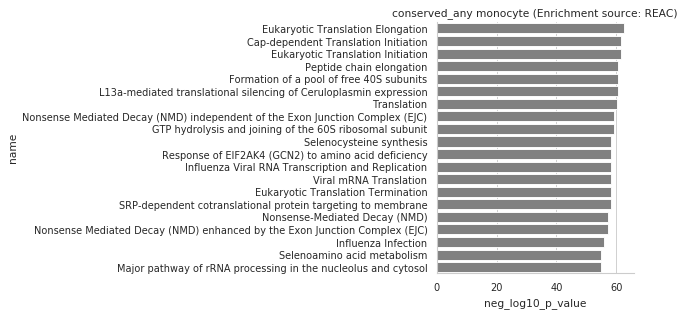

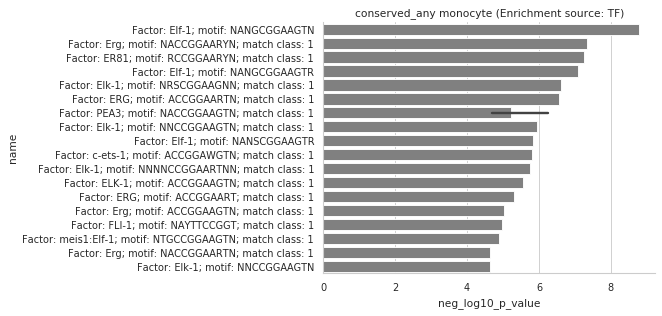

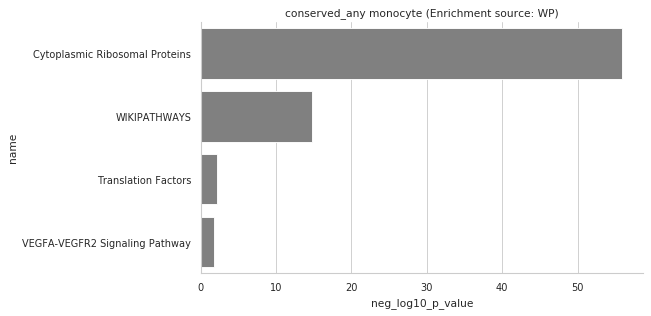

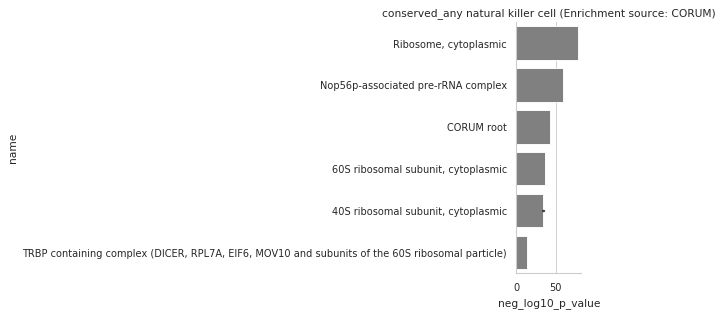

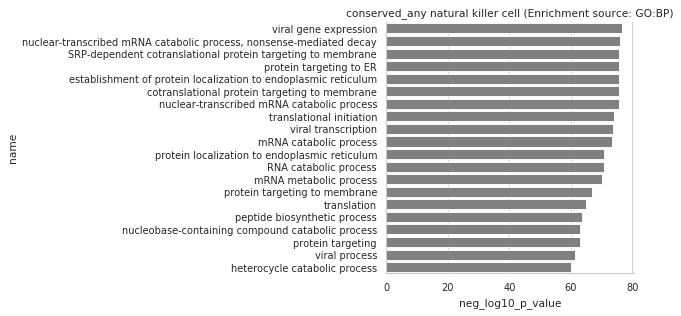

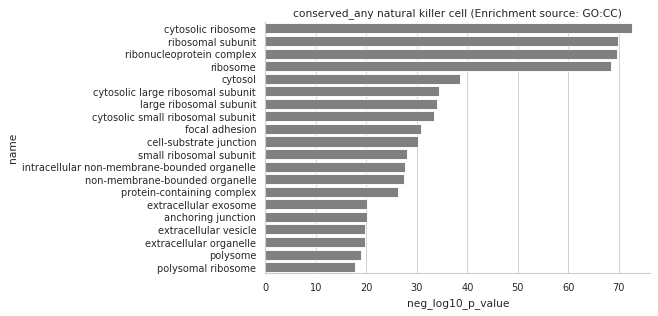

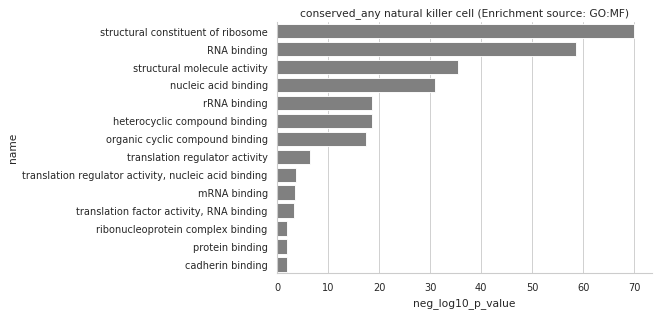

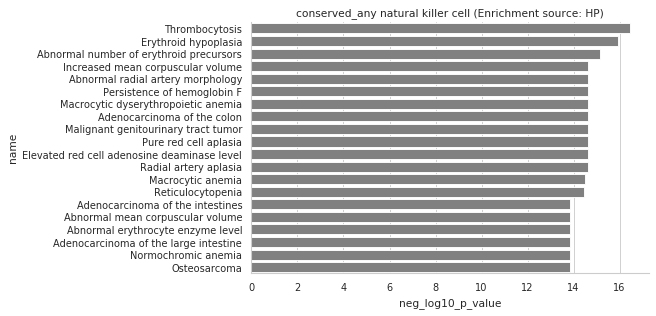

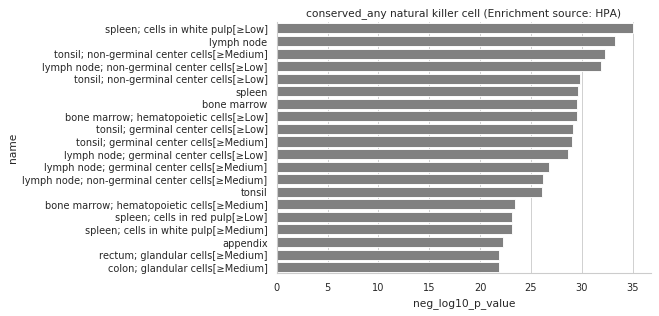

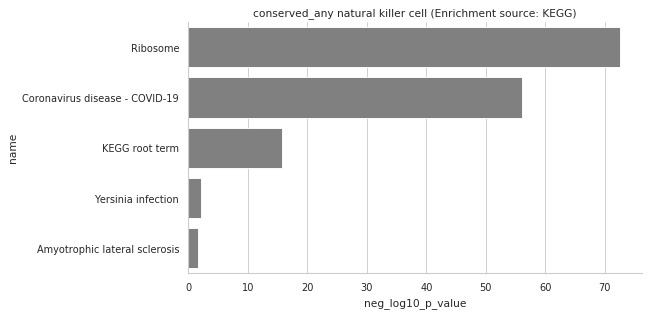

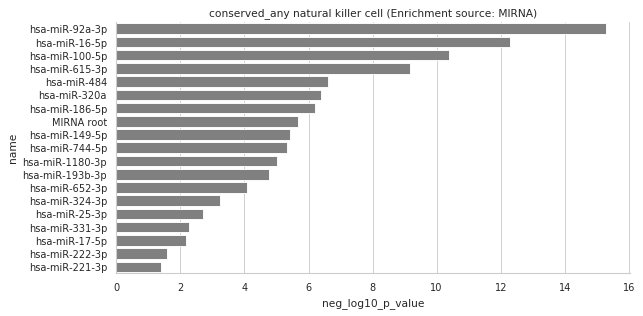

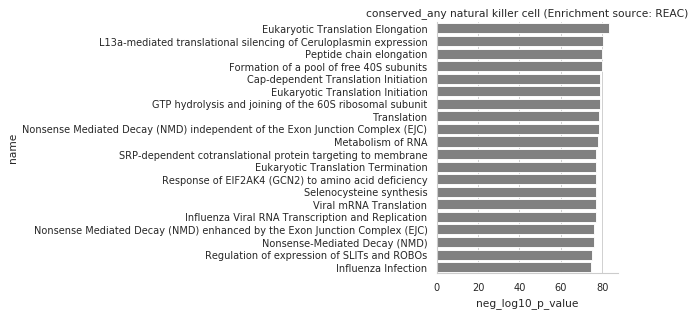

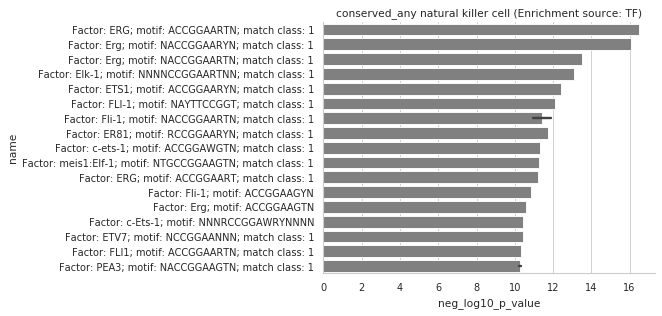

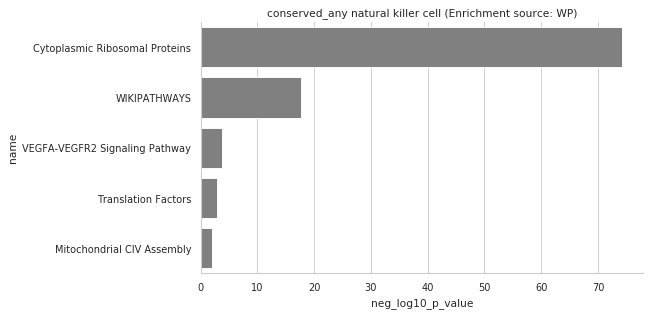

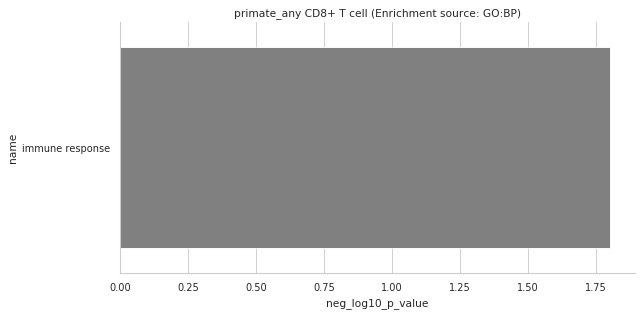

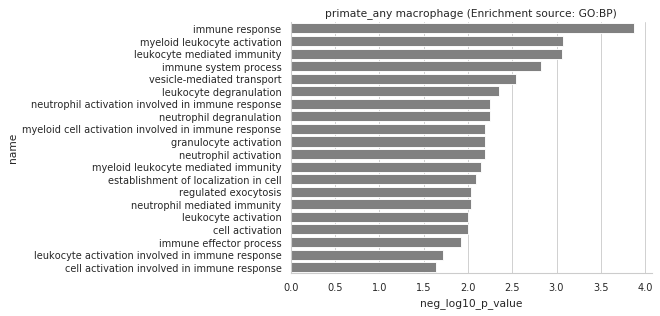

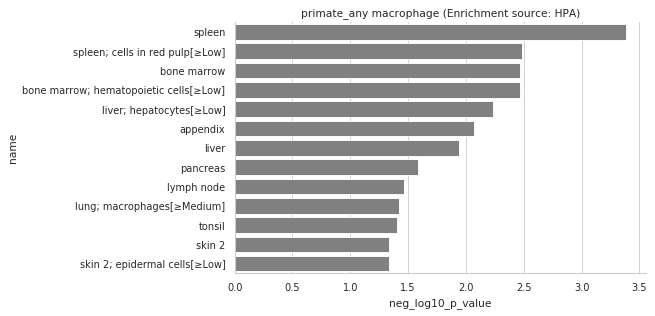

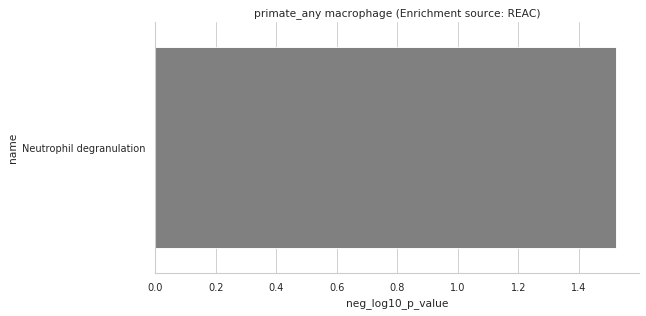

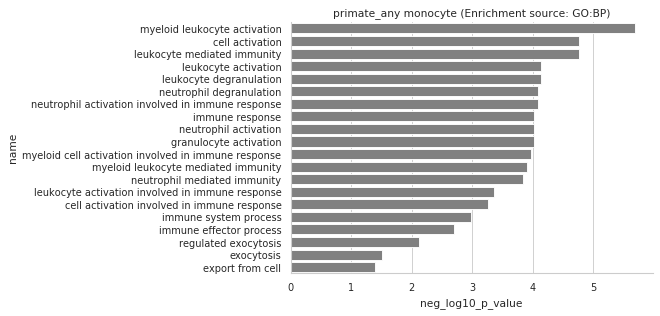

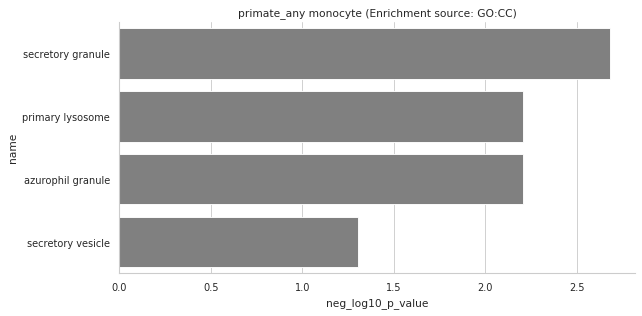

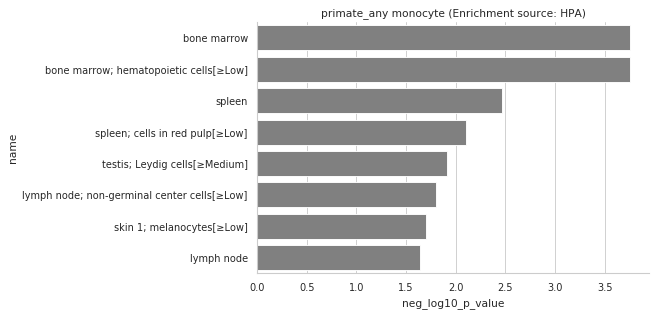

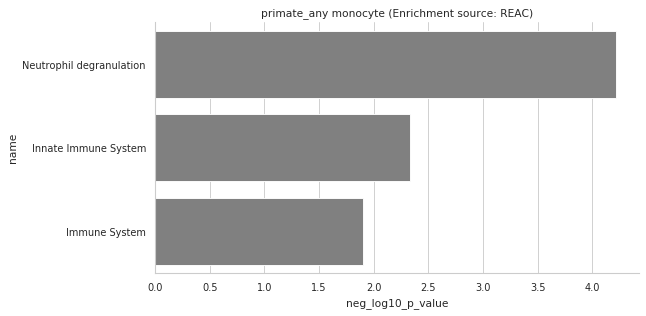

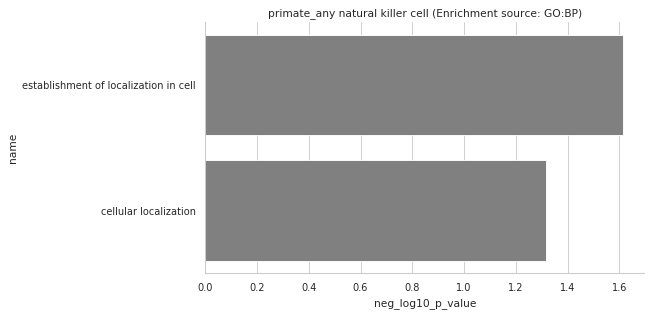

In [38]:
primate.do_per_group_enrichment(groupby_source=True, write=True)

figure_folder = os.path.join(figure_folder_base, "primate-gprofiler-enrichment")

save_figures(figure_folder)

# Categorize genes in binarized across cell types

## Across compartment

In [39]:
compartment_narrow_to_compartment = adata.obs[
    ["compartment_narrow", "compartment_group"]
].set_index("compartment_narrow")["compartment_group"]
compartment_narrow_to_compartment = compartment_narrow_to_compartment[
    ~compartment_narrow_to_compartment.index.duplicated()
]
compartment_narrow_to_compartment

compartment_narrow
lymphoid: natural killer cell    lymphoid
lymphoid: B cell                 lymphoid
myeloid: monocyte                 myeloid
lymphoid: CD8+ T cell            lymphoid
lymphoid: CD4+ T cell            lymphoid
myeloid: macrophage               myeloid
Name: compartment_group, dtype: category
Categories (2, object): ['lymphoid', 'myeloid']

In [45]:
narrow_to_compartment = adata.obs[
    ["narrow_group", "compartment_group"]
].set_index("narrow_group")["compartment_group"]
narrow_to_compartment = narrow_to_compartment[
    ~narrow_to_compartment.index.duplicated()
]
narrow_to_compartment

narrow_group
natural killer cell    lymphoid
B cell                 lymphoid
monocyte                myeloid
CD8+ T cell            lymphoid
CD4+ T cell            lymphoid
macrophage              myeloid
Name: compartment_group, dtype: category
Categories (2, object): ['lymphoid', 'myeloid']

In [ ]:
binarized_per_gene = stability.binarized

In [48]:
narrow_to_compartment

narrow_group
natural killer cell    lymphoid
B cell                 lymphoid
monocyte                myeloid
CD8+ T cell            lymphoid
CD4+ T cell            lymphoid
macrophage              myeloid
Name: compartment_group, dtype: category
Categories (2, object): ['lymphoid', 'myeloid']

In [52]:
binarized_per_gene = stability.binarized.unstack(level=0)
binarized_per_gene.head()

XKR4                     SOX17                    MRPL15  \
species       Mouse Mouse lemur  Human  Mouse Mouse lemur  Human  Mouse   
narrow_group                                                              
B cell        False       False  False  False       False  False   True   
CD4+ T cell   False       False  False  False       False  False   True   
CD8+ T cell   False       False  False  False       False  False   True   
macrophage    False        True  False  False       False  False   True   
monocyte      False        True  False  False       False  False   True   

                               LYPLA1  ...   ASMT  VAMP7                    \
species      Mouse lemur Human  Mouse  ...  Human  Mouse Mouse lemur Human   
narrow_group                           ...                                   
B cell             False  True   True  ...  False  False       False  True   
CD4+ T cell        False  True   True  ...  False   True       False  True   
CD8+ T cell        False  True   True  ...  False   True       False  True   
macrophage          True  True   True  ...  False   True        True  True   
monocyte           False  True   True  ...  False   True        True  True   

              SPRY3                     TMLHE                     
species       Mouse Mouse lemur  Human  Mouse Mouse lemur  Human  
narrow_group                                                      
B cell        False       False  False  False       False  False  
CD4+ T cell   False       False  False  False       False  False  
CD8+ T cell   False       False  False  False       False  False  
macrophage    False       False  False  False       False   True  
monocyte      False       False  False  False       False   True  

[5 rows x 37377 columns]

In [53]:
binarized_per_gene_compartment = (
    binarized_per_gene.groupby(narrow_to_compartment, axis=0).sum() > 0
)
binarized_per_gene_compartment

XKR4                     SOX17                    MRPL15  \
species            Mouse Mouse lemur  Human  Mouse Mouse lemur  Human  Mouse   
compartment_group                                                              
lymphoid           False       False  False  False       False  False   True   
myeloid            False        True  False  False       False  False   True   

                                    LYPLA1  ...   ASMT VAMP7              \
species           Mouse lemur Human  Mouse  ...  Human Mouse Mouse lemur   
compartment_group                           ...                            
lymphoid                False  True   True  ...  False  True       False   
myeloid                  True  True   True  ...  False  True        True   

                         SPRY3                     TMLHE                     
species           Human  Mouse Mouse lemur  Human  Mouse Mouse lemur  Human  
compartment_group                                                            
lymphoid           True  False       False  False  False       False  False  
myeloid            True  False       False  False  False       False   True  

[2 rows x 37377 columns]

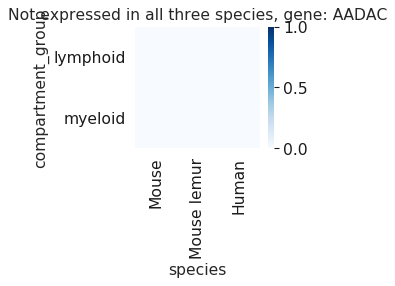

In [54]:
binarized.query_binarized_category_and_plot("AADAC", binarized_per_gene_compartment)

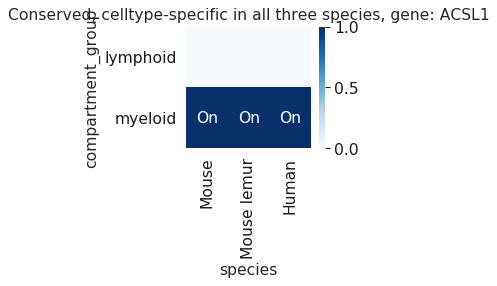

In [56]:
x = binarized_per_gene_compartment['ACSL1']
binarized.query_binarized_category_and_plot("ACSL1", binarized_per_gene_compartment)

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2))
binarized.plot_binarized_gene('HHIP', binarized_per_gene_compartment)

### Do per-compartment

In [ ]:
# %%time
# per_gene_catgorization_compartment = binarized_per_gene_compartment.groupby(
#     level=0, axis=1
# ).apply(categorize_genes)
# per_gene_catgorization_compartment["HHIP"]

### Parallelized per Celltype

In [83]:
# remove_rogue_tqdm()

In [126]:
%%time

# remove_rogue_tqdm()

grouped = binarized_per_gene.groupby(level=0, axis=1)

results = Parallel(n_jobs=16)(
    delayed(binarized.categorize_genes)(df) for gene, df in grouped
)
per_gene_catgorization_compartment = pd.Series(results, index=grouped.groups.keys())
per_gene_catgorization_compartment["HHIP"]


CPU times: user 18.1 s, sys: 1.36 s, total: 19.5 s
Wall time: 23.3 s


'Not expressed in all three species'

In [127]:
pd.options.display.max_colwidth = 500

In [128]:
per_gene_catgorization_compartment_counts = (
    per_gene_catgorization_compartment.value_counts().reset_index()
)
per_gene_catgorization_compartment_counts = (
    per_gene_catgorization_compartment_counts.rename(
        columns={"index": "gene_category", 0: "n_genes"}
    )
)
per_gene_catgorization_compartment_counts

gene_category  n_genes
0                          Not expressed in all three species     3906
1                           Human-specific, celltype-specific     2160
2               Constitutively expressed in all three species     1533
3                                                       Other     1227
4        Nearly constitutively expressed in all three species      909
5                           Lemur-specific, celltype-specific      467
6              Mouse-specific, celltype-specific, lemur=human      456
7                          Expansion to constitutive in human      266
8                                       Expansion to primates      227
9           Conserved, celltype-specific in all three species      180
10                       Contraction in primates, lemur=human      159
11                                    Contraction in primates      157
12           Contraction in primates to constitutive in mouse      156
13                     Constitutively expressed in Human only      152
14         Expansion to constitutive in primates, lemur=human      136
15  Contraction in human from constitutive in mouse and lemur      120
16                Constitutively expressed in Human and Mouse       91
17                         Expansion to primates, lemur=human       48
18               Constitutively expressed in Mouse lemur only       26
19                  Celltype-switching, lemur closer to mouse       22
20        Constitutively expressed in Mouse only, lemur=human       21
21          Constitutively expressed in Primates, lemur=human       12
22                            Expansion in human, lemur=mouse       10
23          Constitutively expressed in Mouse and Mouse Lemur       10
24              Celltype-switching, mouse!=human, lemur=human        8

### Write binarized to file

In [129]:
parquet = os.path.join(figure_folder_base, f'binarized__{tissue}__{celltype_group}.parquet')
print(parquet)
binarized_per_gene.stack(level=-1).to_parquet(parquet)

/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle/blood/binarized/binarized__blood__narrow_group.parquet


In [134]:
sns.set_context('paper')

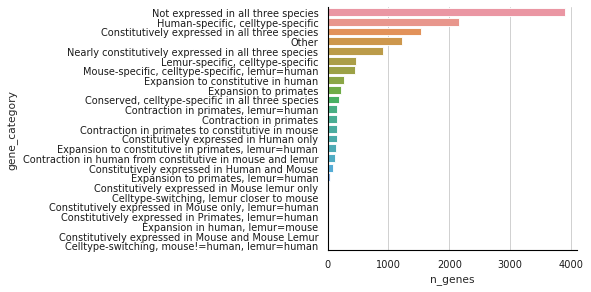

In [135]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(data=per_gene_catgorization_compartment_counts, x='n_genes', y='gene_category')
sns.despine()
fig.savefig(
    os.path.join(figure_folder_base, f"{tissue}__gene_categories.pdf")
)

In [136]:
lemur_eq_human = per_gene_catgorization_compartment_counts.loc[
    per_gene_catgorization_compartment_counts.gene_category.str.contains("lemur=human")
]
lemur_eq_human

gene_category  n_genes
6        Mouse-specific, celltype-specific, lemur=human      456
10                 Contraction in primates, lemur=human      159
14   Expansion to constitutive in primates, lemur=human      136
17                   Expansion to primates, lemur=human       48
20  Constitutively expressed in Mouse only, lemur=human       21
21    Constitutively expressed in Primates, lemur=human       12
24        Celltype-switching, mouse!=human, lemur=human        8

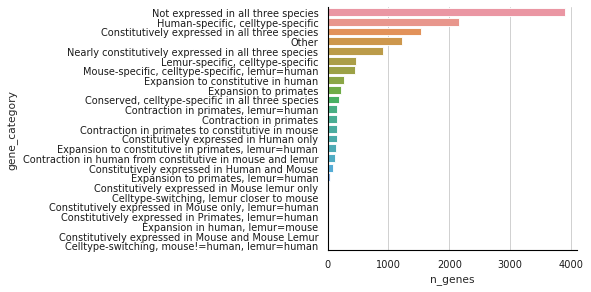

In [137]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(data=per_gene_catgorization_compartment_counts, x='n_genes', y='gene_category')
sns.despine()
fig.savefig(
    os.path.join(figure_folder_base, f"{tissue}__gene_categories.pdf")
)

### Dotplot of `Constitutively expressed in Primates`

In [138]:
primate_constitutive_strings = [
    "Expansion to constitutive in primates, lemur=human",
    "Constitutively expressed in Primates, lemur=human",
]

In [139]:
compartment_constitutive_primates = per_gene_catgorization_compartment[
    per_gene_catgorization_compartment.isin(primate_constitutive_strings)
]
compartment_constitutive_primates

gene_name
AAK1       Expansion to constitutive in primates, lemur=human
ABHD13     Expansion to constitutive in primates, lemur=human
ACAP2      Expansion to constitutive in primates, lemur=human
ALOX5AP    Expansion to constitutive in primates, lemur=human
AMZ2       Expansion to constitutive in primates, lemur=human
                                  ...                        
ZDHHC12    Expansion to constitutive in primates, lemur=human
ZNF394     Expansion to constitutive in primates, lemur=human
ZNF580     Expansion to constitutive in primates, lemur=human
ZNF644     Expansion to constitutive in primates, lemur=human
ZNF652     Expansion to constitutive in primates, lemur=human
Name: gene_category, Length: 148, dtype: object

In [140]:
compartment_constitutive_primates.index.intersection(['AMD1', 'ATP6V0C', 'HNRNPA1', 'TYMP', 'ZNF146'])

Index(['ATP6V0C', 'HNRNPA1', 'TYMP'], dtype='object')

## Compute bitscores of heatmap

In [141]:
binarized_per_gene_compartment_expressed = binarized_per_gene.groupby(level=0, axis=1).filter(lambda x: x.any().any())
binarized_per_gene_compartment_expressed.head()

XKR4                    MRPL15                   LYPLA1  \
species       Mouse Mouse lemur  Human  Mouse Mouse lemur Human  Mouse   
narrow_group                                                             
B cell        False       False  False   True       False  True   True   
CD4+ T cell   False       False  False   True       False  True   True   
CD8+ T cell   False       False  False   True       False  True   True   
macrophage    False        True  False   True        True  True   True   
monocyte      False        True  False   True       False  True   True   

                               TCEA1  ... ARHGAP6   HCCS                     \
species      Mouse lemur Human Mouse  ...   Human  Mouse Mouse lemur  Human   
narrow_group                          ...                                     
B cell             False  True  True  ...   False   True       False   True   
CD4+ T cell        False  True  True  ...   False   True       False   True   
CD8+ T cell        False  True  True  ...   False  False       False  False   
macrophage         False  True  True  ...    True   True        True   True   
monocyte           False  True  True  ...   False   True       False   True   

              VAMP7                    TMLHE                     
species       Mouse Mouse lemur Human  Mouse Mouse lemur  Human  
narrow_group                                                     
B cell        False       False  True  False       False  False  
CD4+ T cell    True       False  True  False       False  False  
CD8+ T cell    True       False  True  False       False  False  
macrophage     True        True  True  False       False   True  
monocyte       True        True  True  False       False   True  

[5 rows x 25659 columns]

In [142]:
celltype_binarized_bitscore = binarized.compute_bitscores(binarized_per_gene)
celltype_binarized_bitscore.value_counts()

111111111111111111    1533
000000000001000000     471
000000000100000000     214
000000000101000000     173
101111111111111111     117
                      ... 
000000000101010001       1
010100000111011000       1
000010010110110010       1
000100000111111100       1
011001000101101000       1
Length: 2195, dtype: int64

## Join bitscores with categorization

In [143]:
celltype_binarized_bitscore_value_counts = celltype_binarized_bitscore.value_counts()
celltype_binarized_bitscore_value_counts.head()

111111111111111111    1533
000000000001000000     471
000000000100000000     214
000000000101000000     173
101111111111111111     117
dtype: int64

In [148]:
gene_categories_bitscore = pd.DataFrame(
    {
        "bitscore": celltype_binarized_bitscore,
        "gene_category": per_gene_catgorization_compartment,
    }
)
gene_categories_bitscore = gene_categories_bitscore.dropna()
gene_categories_bitscore.head()

bitscore                      gene_category
A1BG     001001001001001000  Human-specific, celltype-specific
A2M      000000000001001000  Human-specific, celltype-specific
A3GALT2  000000000010010000  Lemur-specific, celltype-specific
A4GALT   000000000001000000  Human-specific, celltype-specific
AAAS     101000000101000000  Human-specific, celltype-specific

## Write categorizations with bitscores to file

In [149]:
celltype_group = "narrow_group"

binarized.save_gene_categorization(
    tissue, celltype_group, gene_categories_bitscore, figure_folder_base
)

Saving csv to: /home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle/blood/binarized/per_gene_categorization__blood__narrow_group.csv


In [147]:
gene_categories_bitscore.query(
    "bitscore in @bitscores_to_use.index"
).groupby("gene_category").bitscore.unique()

gene_category
Conserved, celltype-specific in all three species                                                                                                                                                                                                                    [000000000111111000, 000000000111000000]
Constitutively expressed in Human and Mouse                                                                                                                                                                                                                                              [101101101101101101]
Constitutively expressed in Human only                                                                                                                                                                                                                                                   [001001001001001001]
Constitutively expressed in Mouse only, lemur=human                             

### Plot heatmap bitscore

len(bitscores_to_use): 91


'110110110110110110'

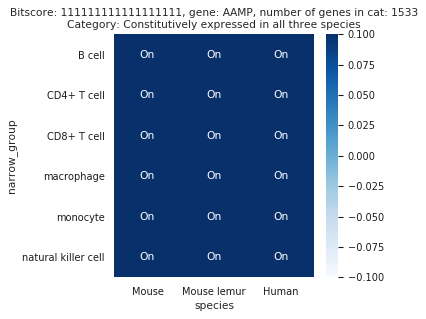

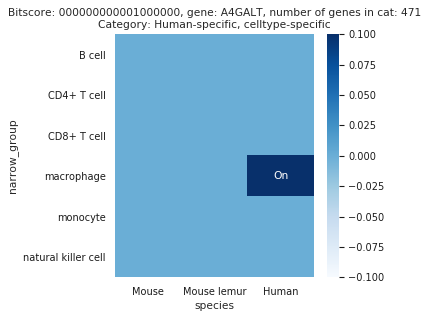

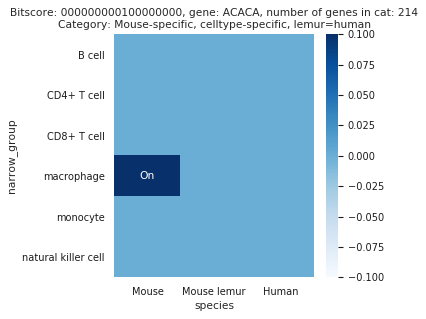

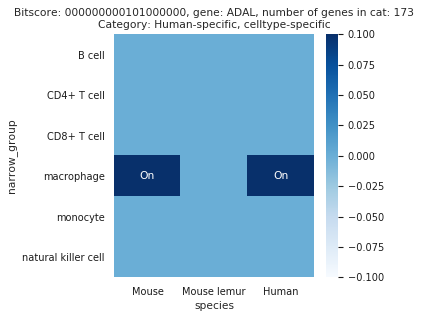

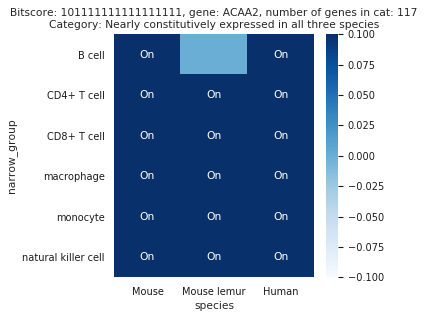

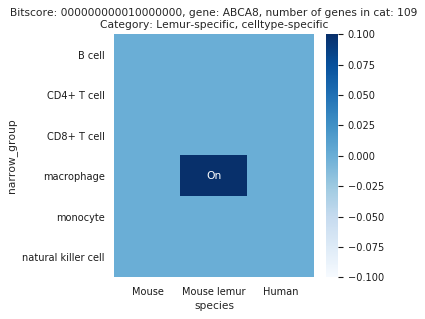

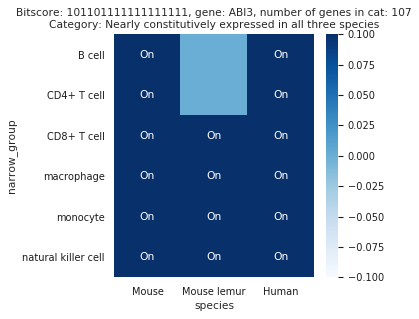

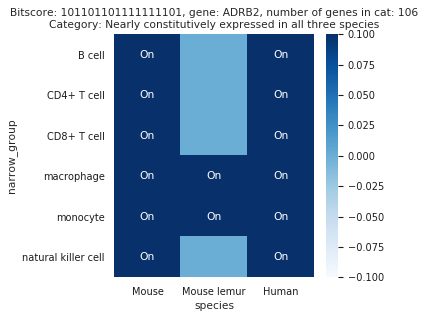

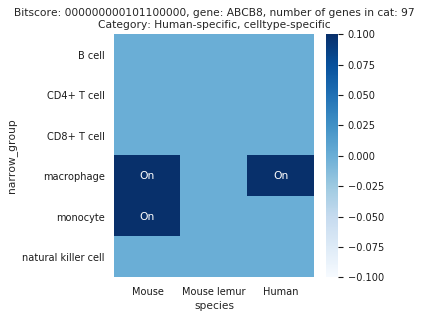

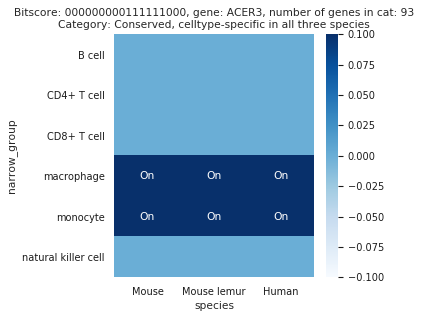

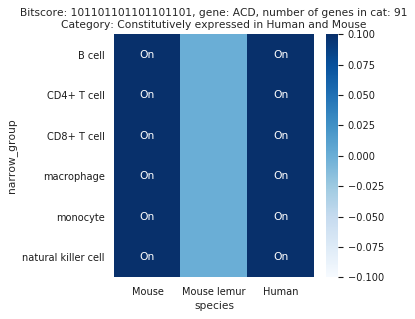

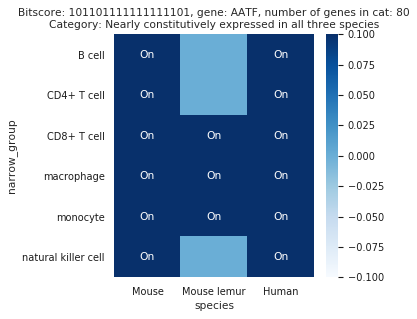

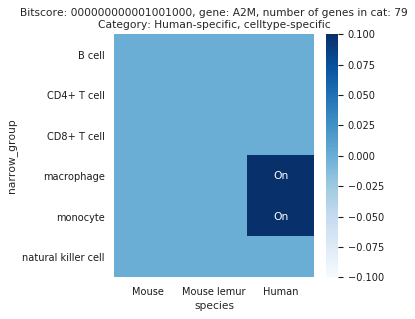

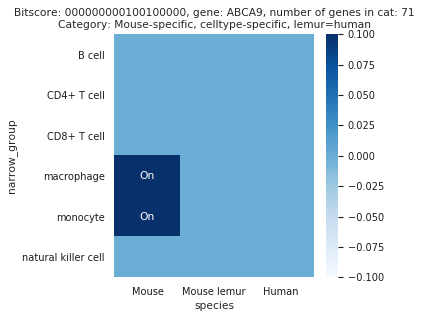

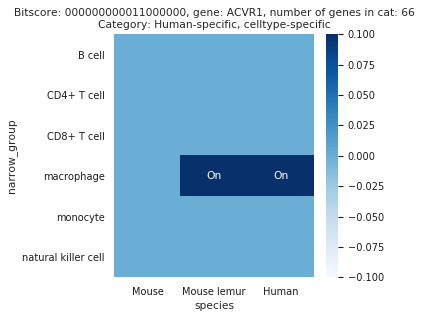

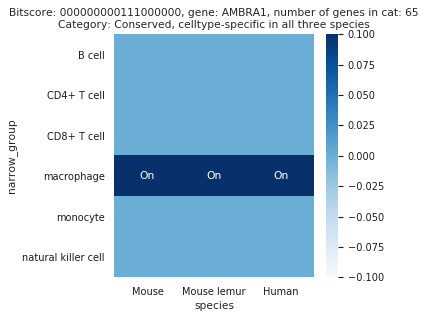

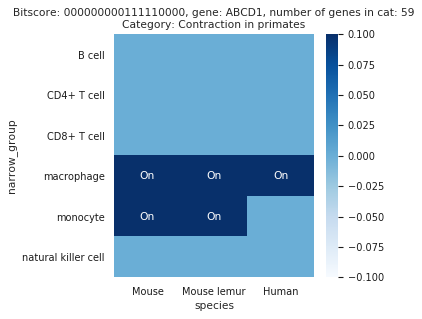

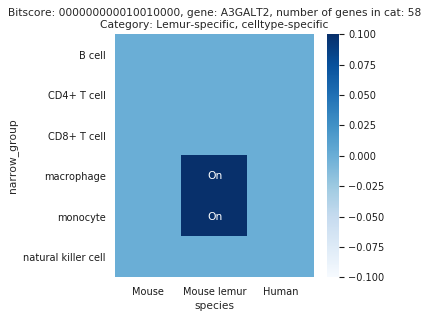

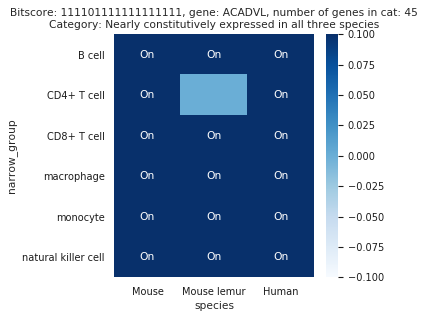

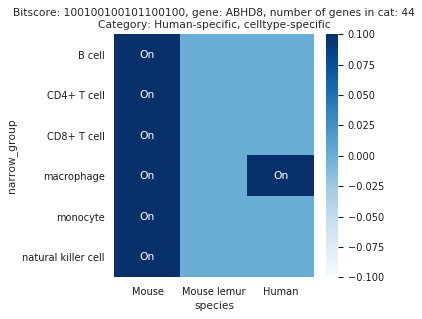

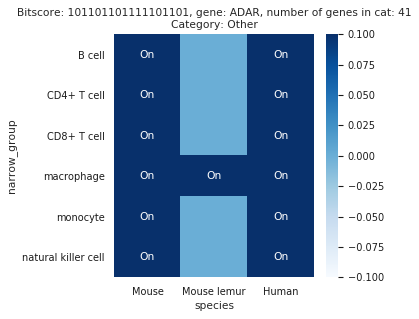

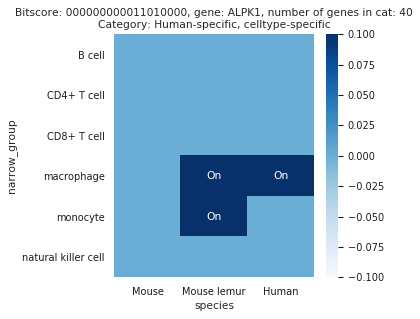

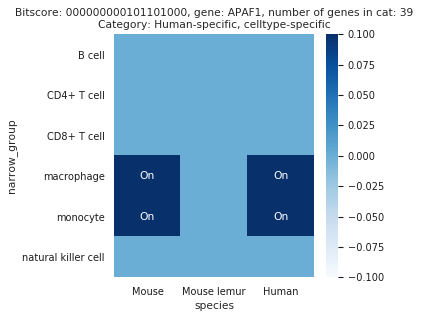

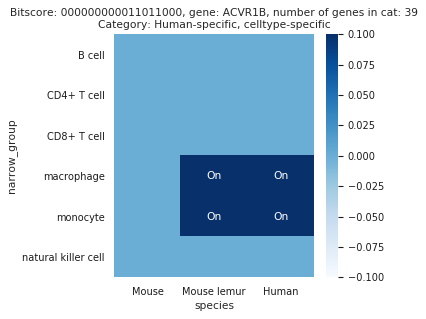

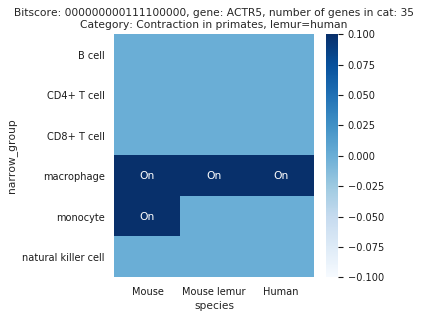

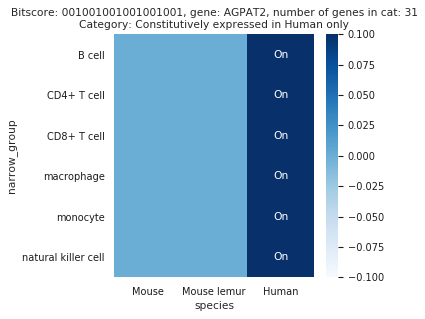

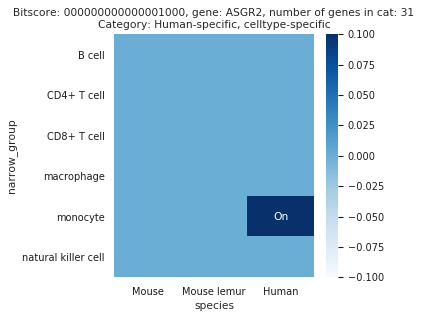

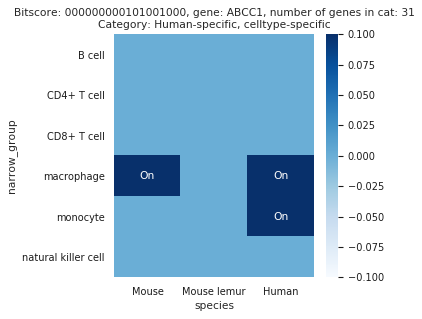

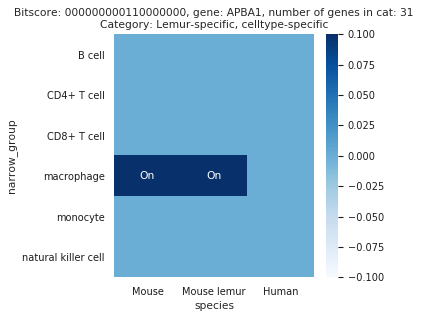

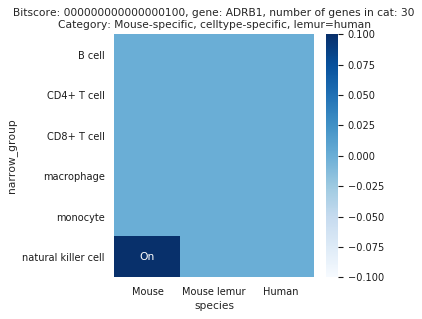

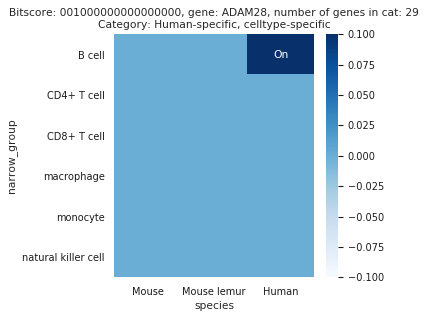

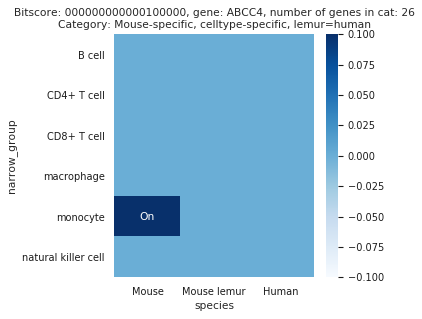

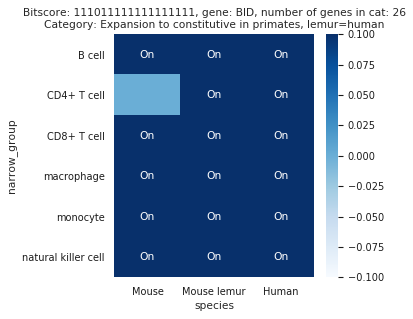

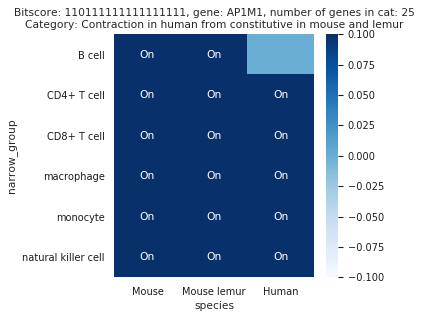

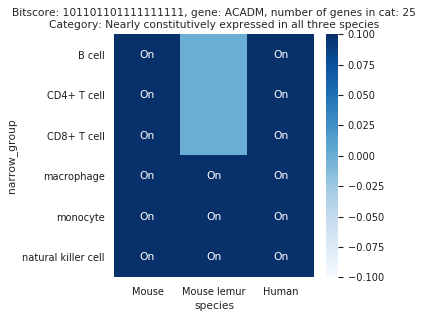

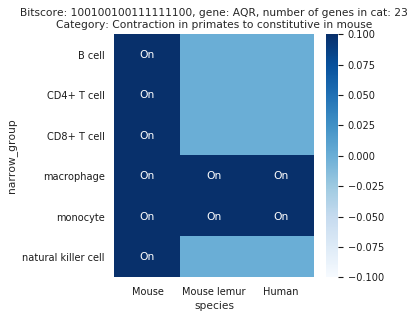

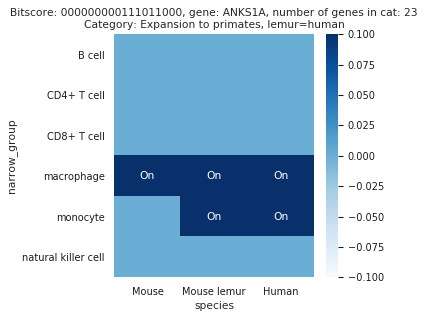

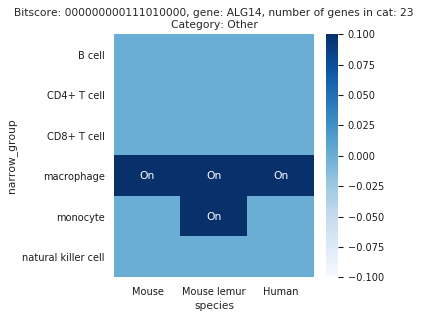

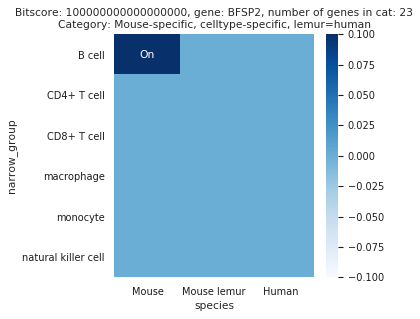

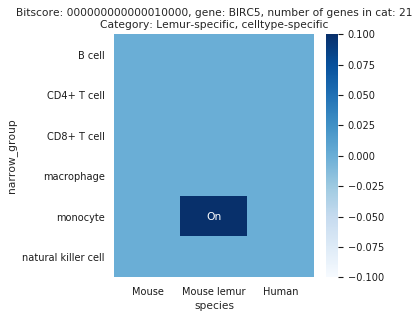

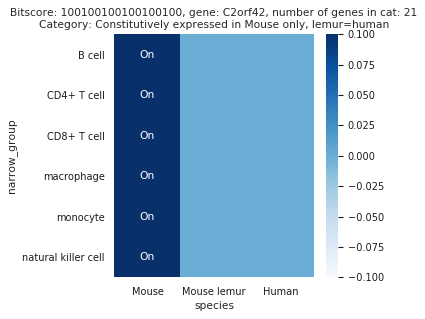

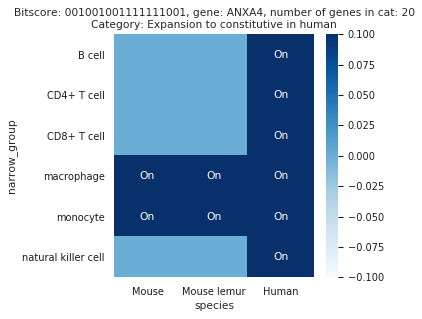

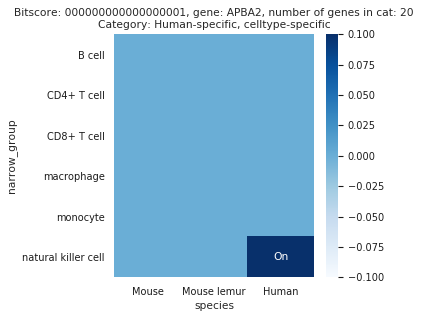

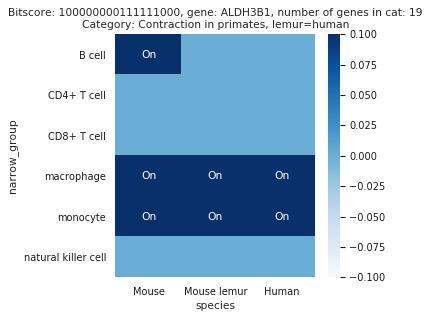

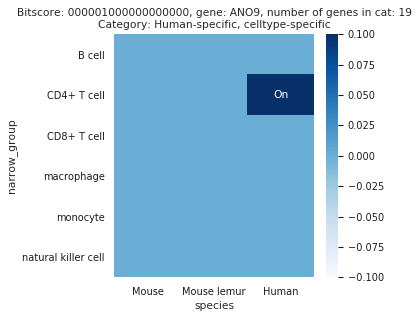

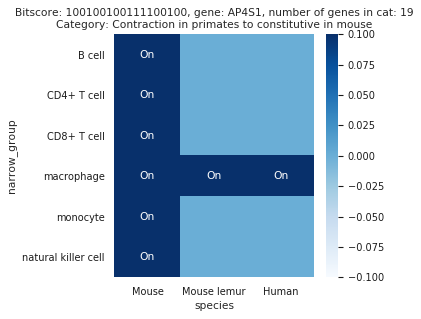

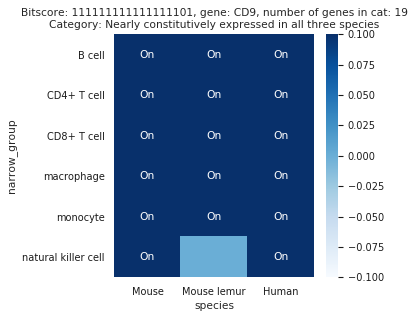

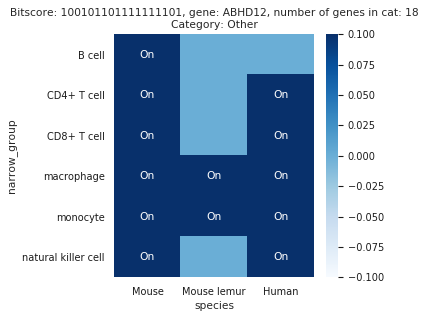

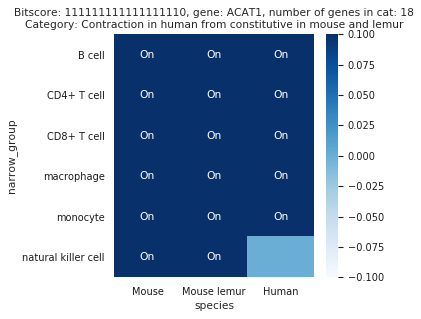

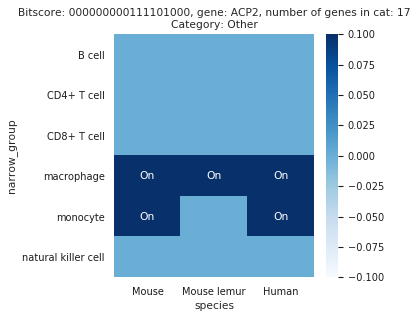

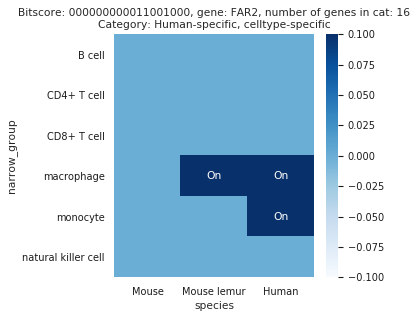

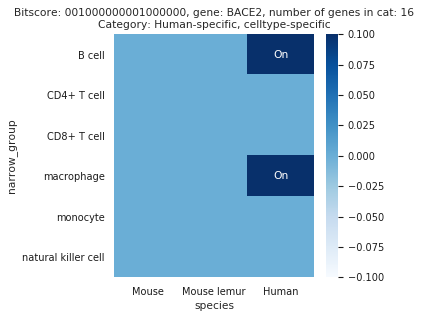

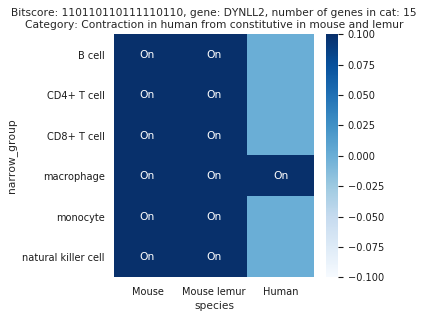

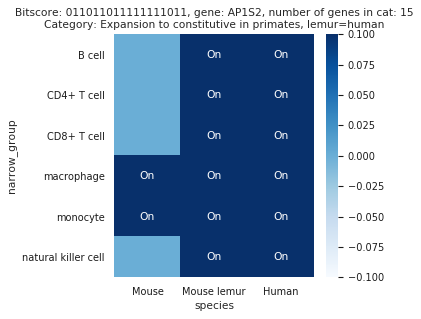

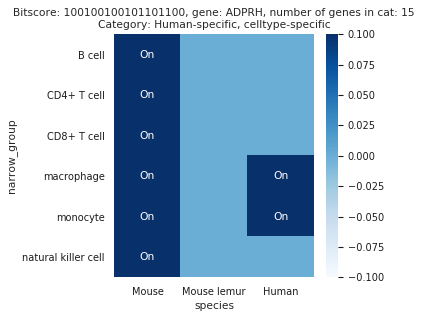

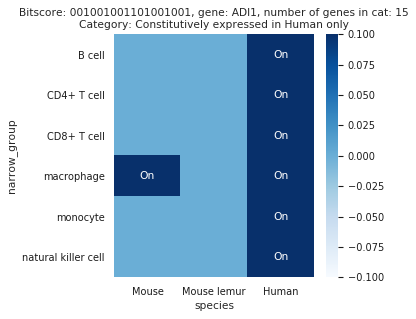

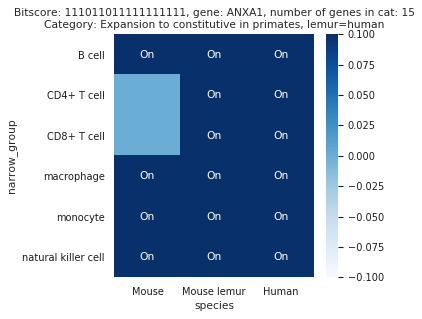

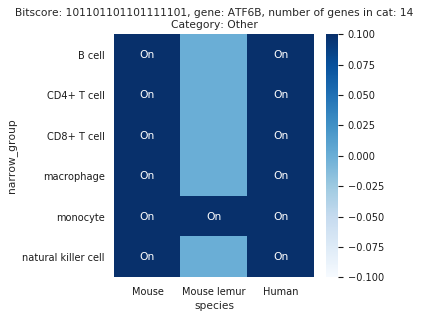

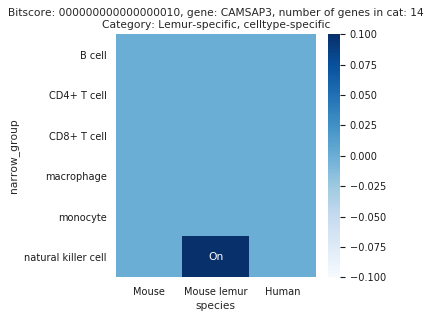

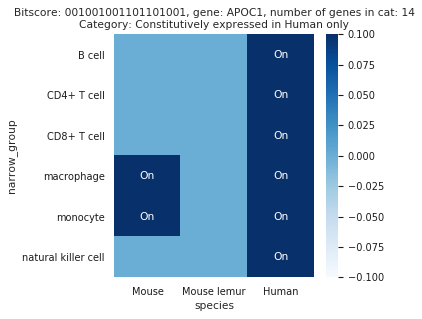

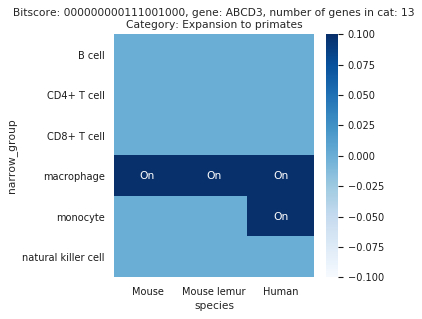

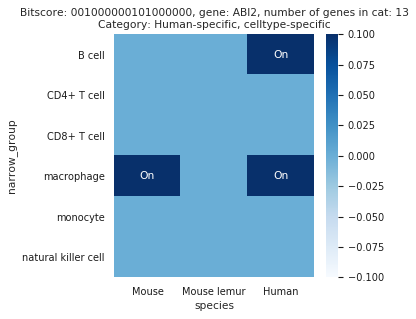

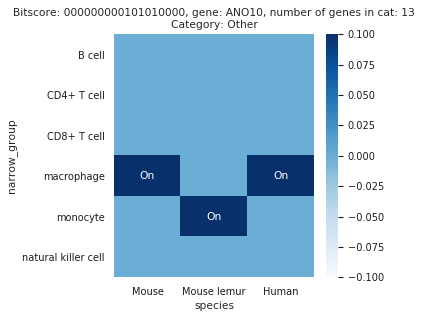

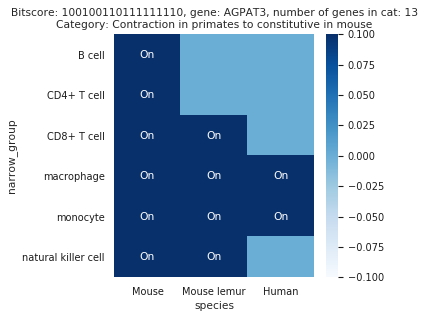

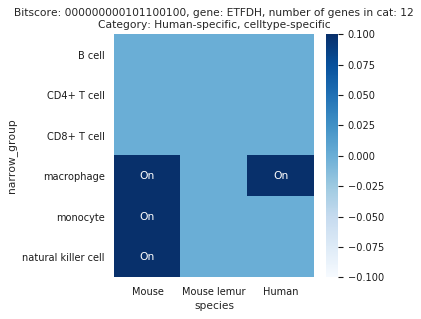

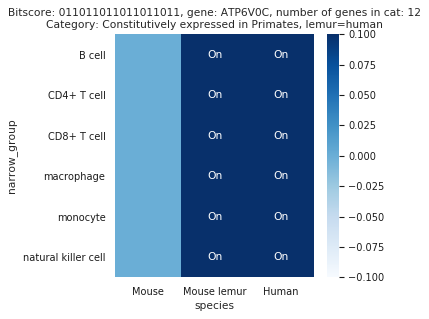

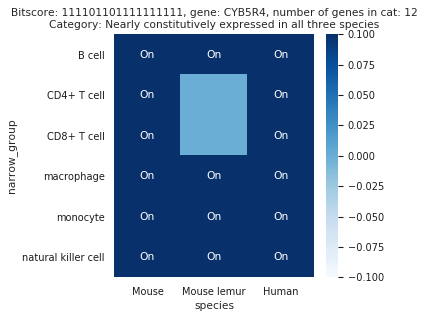

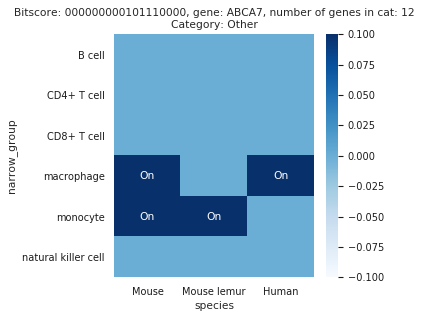

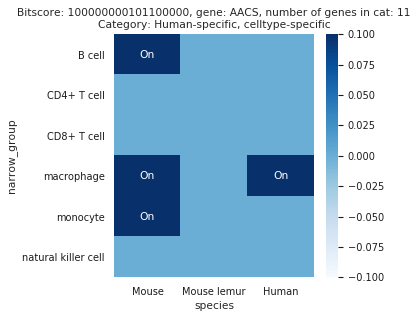

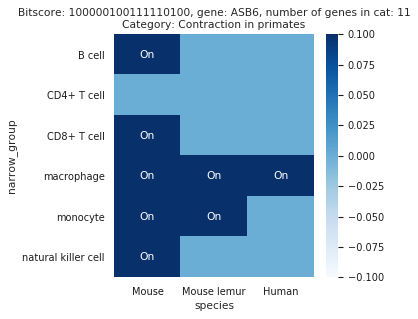

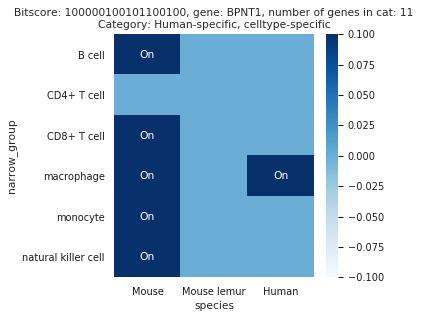

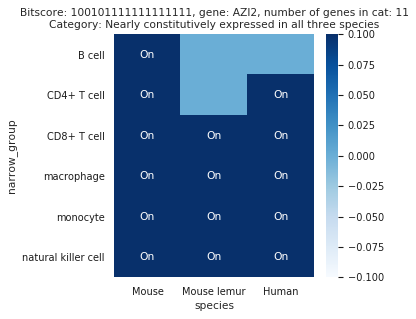

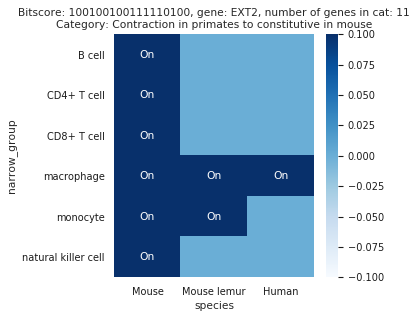

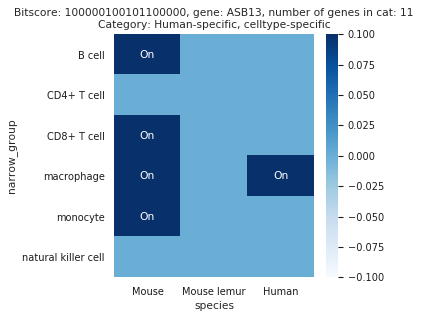

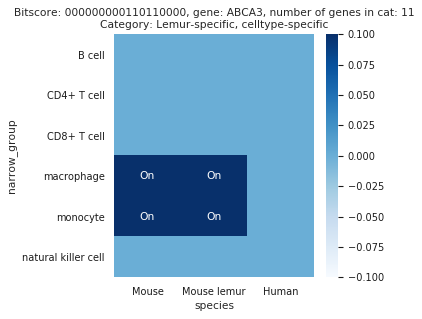

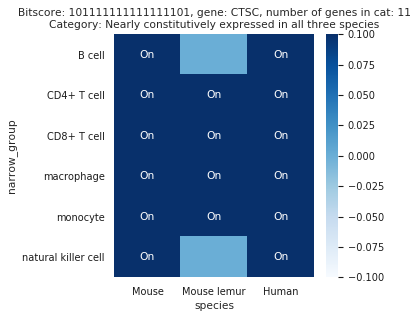

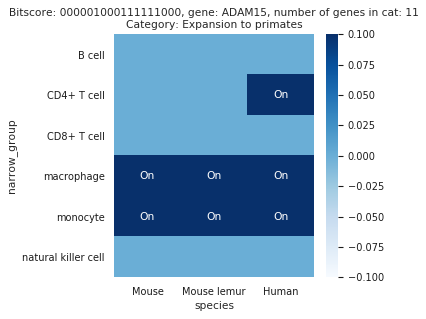

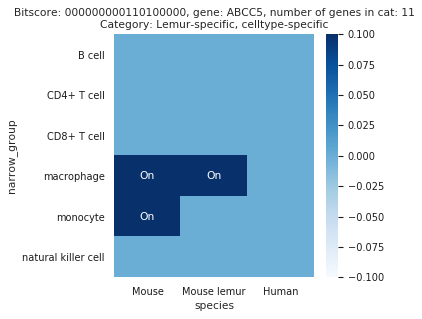

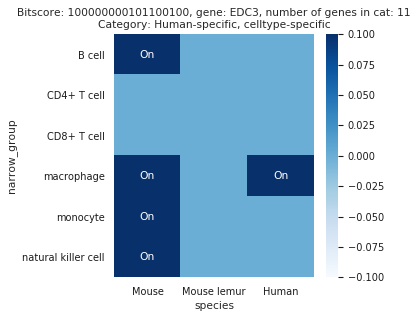

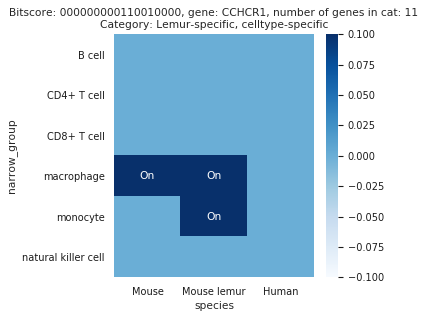

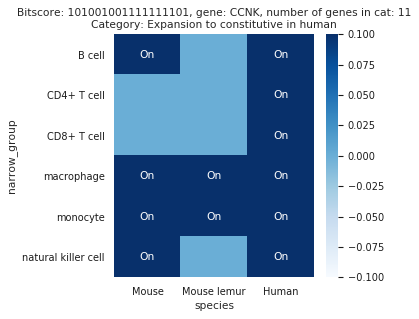

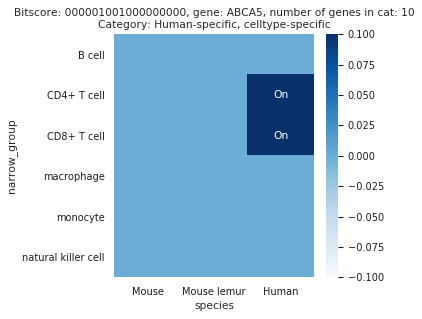

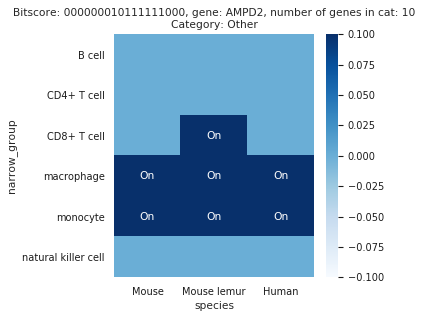

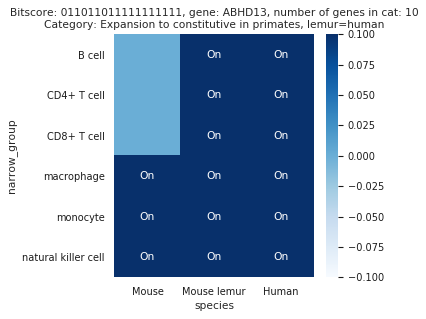

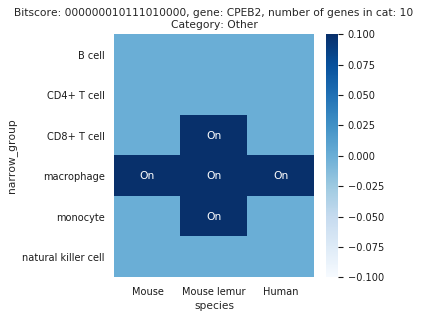

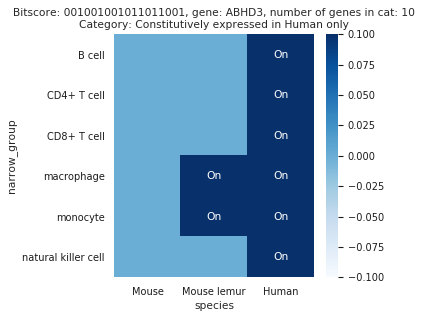

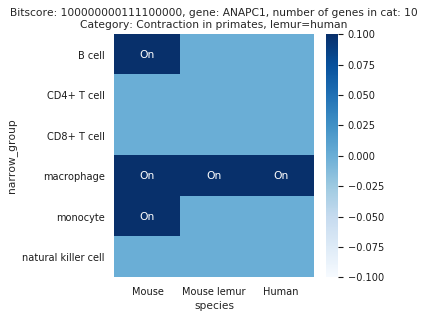

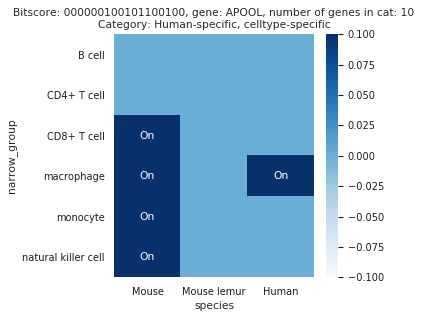

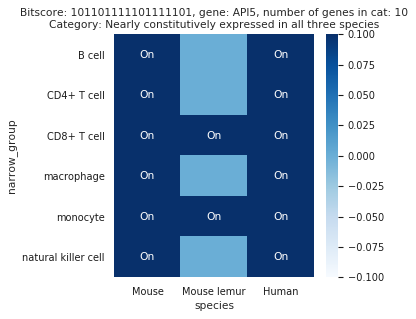

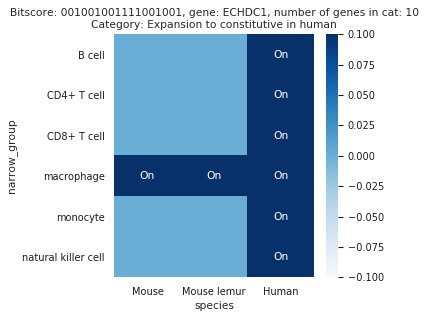

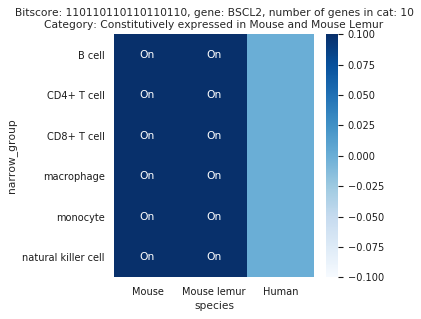

In [151]:
import matplotlib.pyplot as plt

bitscores_to_use = celltype_binarized_bitscore_value_counts[celltype_binarized_bitscore_value_counts >= 10]
print(f"len(bitscores_to_use): {len(bitscores_to_use)}")

# for bitscore, series in binarized_bitscore.groupby(binarized_bitscore):
for bitscore, n_genes in bitscores_to_use.iteritems():
    series = gene_categories_bitscore.loc[gene_categories_bitscore.bitscore == bitscore]
#     print(f'--- bitscore: {bitscore} ---')
    for gene in series.index[:1]:
        fig, ax = plt.subplots()
        data = binarized_per_gene[gene]
#         sns.heatmap(, )
        annot = data.applymap(lambda x: 'On' if x else '')
        gene_category = gene_categories_bitscore.query('bitscore == @bitscore')['gene_category'].iloc[0]
        sns.heatmap(data, cmap='Blues', annot=annot, fmt='s', vmin=0, vmax=0)
        ax.set(title=f"Bitscore: {bitscore}, gene: {gene}, number of genes in cat: {n_genes}\nCategory: {gene_category}")

bitscore

In [81]:
gene_categories_bitscore

bitscore                                  gene_category
A1BG        18724              Human-specific, celltype-specific
A2M         18432              Human-specific, celltype-specific
A3GALT2      9216              Lemur-specific, celltype-specific
A4GALT       2048              Human-specific, celltype-specific
A4GNT           0             Not expressed in all three species
...           ...                                            ...
ZWINT       35392                                          Other
ZYG11A          0             Not expressed in all three species
ZYG11B      23113                                          Other
ZYX        262143  Constitutively expressed in all three species
ZZEF1       55873                                          Other

[12459 rows x 2 columns]

In [79]:
series

bitscore gene_category
A1BG          NaN           NaN
A2M           NaN           NaN
A3GALT2       NaN           NaN
A4GALT        NaN           NaN
A4GNT         NaN           NaN
...           ...           ...
ZWINT         NaN           NaN
ZYG11A        NaN           NaN
ZYG11B        NaN           NaN
ZYX           NaN           NaN
ZZEF1         NaN           NaN

[12459 rows x 2 columns]

# End of notebook